In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2. Phân tích dữ liệu - EDA
Thành viên nhóm:

  - Mai Anh Khoa - 23520744
  - Võ Tạ Hữu Huy - 23520655
  - Hà Tuấn Anh - 23520044

### Nhập thư viện

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2.1. Sơ bộ về dữ liệu

Bối cảnh bài toán:
- Một công ty ô tô có kế hoạch thâm nhập thị trường mới với các sản phẩm hiện có của họ (P1, P2, P3, P4 và P5). Sau khi nghiên cứu thị trường chuyên sâu, họ đã suy luận rằng hành vi của thị trường mới tương tự như thị trường hiện tại của họ.

- Trong thị trường hiện tại của họ, nhóm bán hàng đã phân loại tất cả khách hàng thành 4 phân khúc (A, B, C, D). Sau đó, họ thực hiện tiếp cận và truyền thông theo phân khúc cho một phân khúc khách hàng khác. Chiến lược này đã hoạt động cực kỳ hiệu quả đối với họ. Họ có kế hoạch sử dụng cùng một chiến lược cho các thị trường mới và đã xác định được 2627 khách hàng tiềm năng mới.
- Bạn có nhiệm vụ giúp người quản lý dự đoán đúng nhóm khách hàng mới.

Loại bài toán: Multi Classification - Customer Segmentation.

Nguồn dữ liệu: https://www.kaggle.com/datasets/kaushiksuresh147/customer-segmentation.


### Nhập dữ liệu

In [10]:
df = pd.read_csv('/content/drive/MyDrive/CS116.Python_ML/Project/Data (Customer)/Train.csv')
df.tail()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B
8067,461879,Male,Yes,37,Yes,Executive,0.0,Average,3.0,Cat_4,B


### Hàng, cột

In [11]:
df.shape

(8068, 11)

Bộ dữ liệu huấn luyện có 8068 hàng và 11 cột, tức có 11 loại thông tin khách hàng và 8068 khách hàng

### Thông tin dữ liệu

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


Khách hàng có 11 loại thông tin bao gồm:
- `ID`: Số thứ tự của khách hàng - số nguyên
- `Gender`: Giới tính của khách hàng - chuỗi
- `Ever_Married`: Tình trạng hôn nhân (đã kết hôn hay chưa?) - chuỗi
- `Age`: Tuổi của khách hàng - số nguyên
- `Graduated`: Khách hàng đã tốt nghiệp hay chưa? - chuỗi
- `Profession`: Lĩnh vực chuyên môn của khách hàng - chuỗi
- `Work_Experience`: Kinh nghiệm làm việc của khách hàng - số thực
- `Spending_Score`: Điều kiện mua sắm của khách hàng - chuỗi
- `Family_Size`: Số lượng thành viên trong gia đình của khách hàng - số nguyên
- `Var_1`: Loại thông tin ẩn danh của khách hàng - chuỗi
- `Segmentation` (Target): Hạng phân khúc của khách hàng - chuỗi

Trong bộ dữ liệu không có thông tin ở một số chỗ

### Thống kê tính toán

In [13]:
df.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


Dữ liệu bị thiếu ở thông tin `Work_Experience` và `Family_Size` do giá trị count nhỏ hơn 8068.

Chi tiết từng thông tin:
- `Age`:
  - Độ tuổi trung bình là 43.
  - Dao động từ 18 đến 89, có sự đa dang về độ tuổi.
- `Work_Experience`:
  - Kinh nghiệm làm việc trải dài từ 0 đến 14 năm.
  - Có nhiều người chưa có kinh nghiệm làm việc.
- `Family_Size`
  - Dao động từ 1 đến 9 người.
  - Chủ yếu từ 2 đến 3 người.


### Thông tin trùng lặp

In [14]:
df.duplicated().sum()

np.int64(0)

Không có dữ liệu nào bị trùng lặp

### Các giá trị duy nhất cho mỗi cột

In [15]:
unique_values = {}

for column in df.columns:

    unique_values[column] = sorted(df[column].value_counts(dropna=True).index)

for column, values in unique_values.items():
    print(f"Unique values for '{column}':")
    print(values)
    print()

Unique values for 'ID':
[458982, 458983, 458984, 458985, 458986, 458987, 458988, 458989, 458990, 458991, 458992, 458993, 458994, 458995, 458996, 458997, 458998, 458999, 459000, 459001, 459002, 459003, 459004, 459006, 459007, 459008, 459009, 459010, 459011, 459012, 459013, 459014, 459015, 459016, 459017, 459018, 459019, 459020, 459021, 459022, 459023, 459024, 459026, 459027, 459028, 459029, 459030, 459031, 459032, 459033, 459034, 459036, 459037, 459038, 459039, 459041, 459042, 459043, 459044, 459046, 459047, 459048, 459049, 459050, 459051, 459052, 459053, 459054, 459055, 459056, 459057, 459058, 459059, 459061, 459062, 459064, 459065, 459066, 459068, 459069, 459070, 459071, 459072, 459073, 459074, 459076, 459077, 459078, 459079, 459080, 459081, 459082, 459083, 459084, 459085, 459086, 459087, 459088, 459089, 459091, 459092, 459093, 459094, 459095, 459096, 459097, 459098, 459099, 459100, 459101, 459104, 459105, 459106, 459107, 459108, 459109, 459111, 459112, 459114, 459115, 459117, 459118,

### Kiểm tra thông tin bị thiếu

In [16]:
df.isnull().sum()

,0
ID,0
Gender,0
Ever_Married,140
Age,0
Graduated,78
Profession,124
Work_Experience,829
Spending_Score,0
Family_Size,335
Var_1,76


Thông tin dữ liệu bị thiếu ở nhiều cột như `Ever_Married`, `Graduated`, `Profession`, `Family_Size`, `Var_1` đặt biệt là cột `Work_Experience`
Cần phải có chiến thuật xử lý phù hợp với những dữ liệu đó.

## 2.1. Phân tích đơn biến

### Age

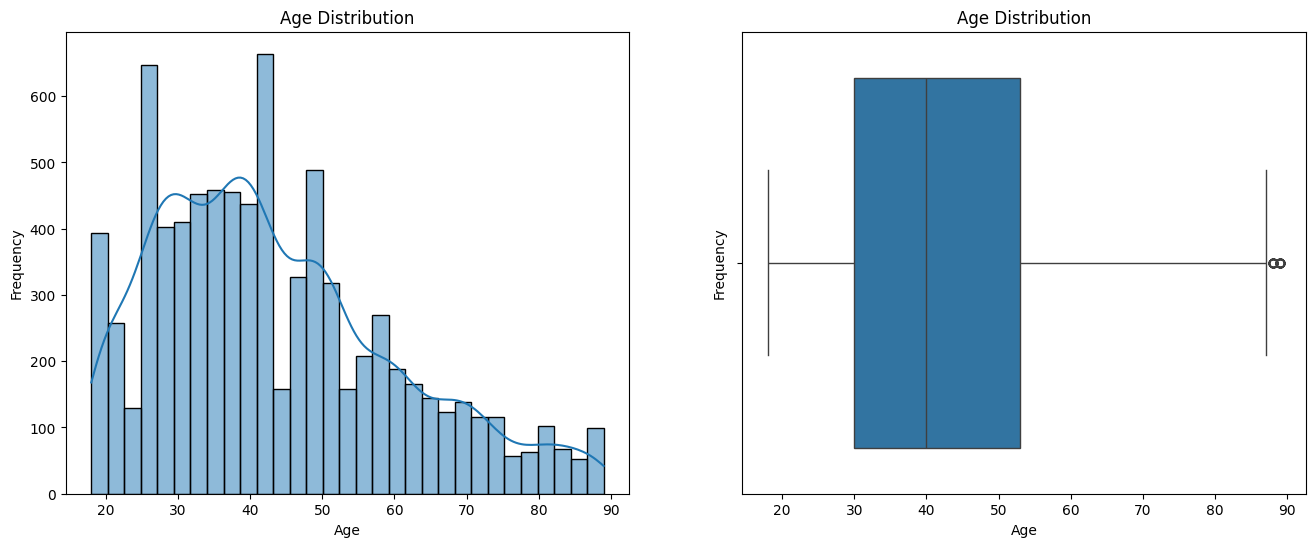

In [17]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x=df['Age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x=df['Age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Biểu đồ Histogram:
- Phân bố không đồng đều, có hai đỉnh rõ rệt ở nhóm tuổi từ 30 đến 50 và một đỉnh khá cao ở nhóm tuổi 20
- Giảm dần ở độ tuổi cao

Biểu đồ Hộp: Hơi lệch về phía bên trái, một số giá trị ngoại lai ở bên rìa phải

-> Nhóm khách hàng chủ yếu là các thanh niên trẻ và những người trung niên



### Work_Experience

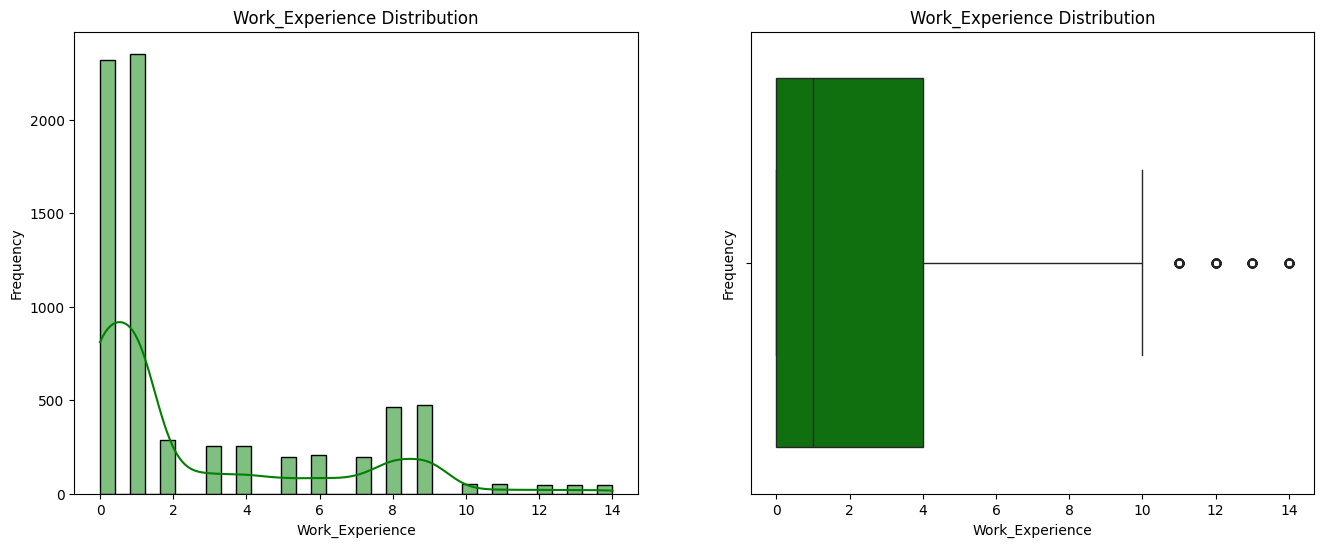

In [18]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x=df['Work_Experience'], kde=True, color='green')
plt.title('Work_Experience Distribution')
plt.xlabel('Work_Experience')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x=df['Work_Experience'], color='green')
plt.title('Work_Experience Distribution')
plt.xlabel('Work_Experience')
plt.ylabel('Frequency')
plt.show()

Biểu đồ Histogram:
- Phân bố không đồng đều, đỉnh cao 0,1 năm kình nghiệm áp đảo so với các nhóm khác
- Số người giảm nhanh chóng khi kinh nghiệm làm việc tăng cao

Biểu đồ Hộp: Lệch mạnh về phía bên trái, nhiều outlier ở rìa phải

-> Phần lớn khách hàng có kinh nghiệm làm việc rất thấp, một số có kinh nghiệm nhiều hơn phần còn lại (outlier)

### Family_Size

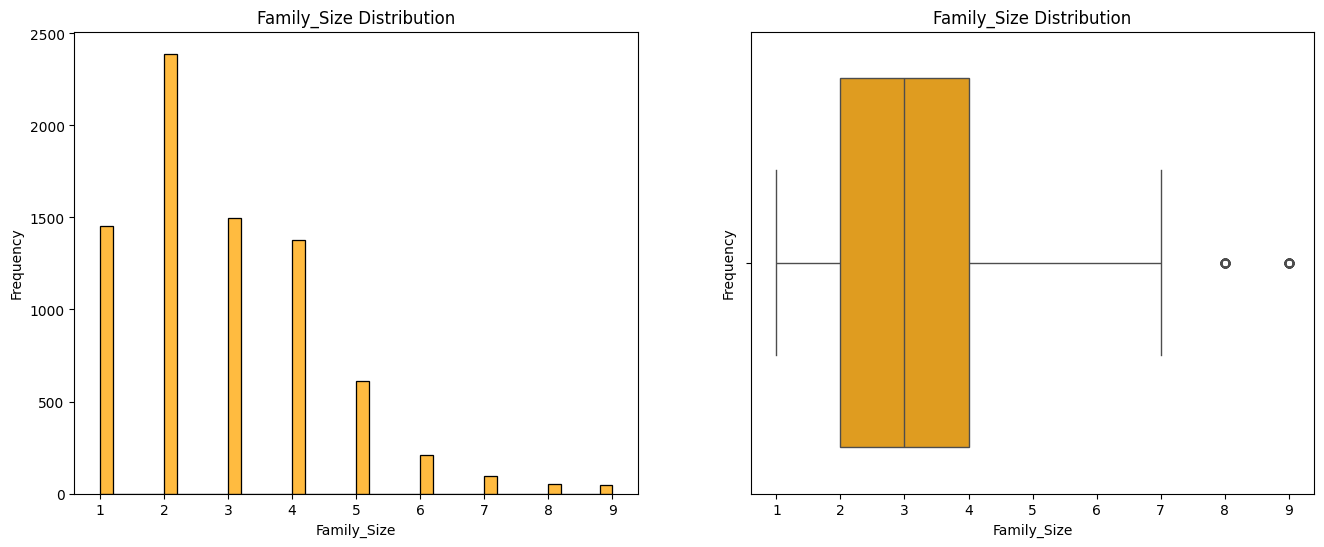

In [19]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x=df['Family_Size'], color='orange')
plt.title('Family_Size Distribution')
plt.xlabel('Family_Size')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x=df['Family_Size'], color='orange')
plt.title('Family_Size Distribution')
plt.xlabel('Family_Size')
plt.ylabel('Frequency')
plt.show()

Biểu đồ Histogram:
- Phân bố không đồng đều, phần lớn giá đình có từ 2 đến 3 thành viên
- Số gia đình giảm khá nhanh khi kích thước thành viên tăng lên

Biểu đồ Hộp: Lệch mạnh về phía bên phải, nhiều outlier ở rìa phải

-> Phần lớn khách hàng có gia đình ít thành viên, những có một số khách hàng có gia đình đông hơn phần lớn những khách hàng còn lại (outliner)

In [20]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

### Gender

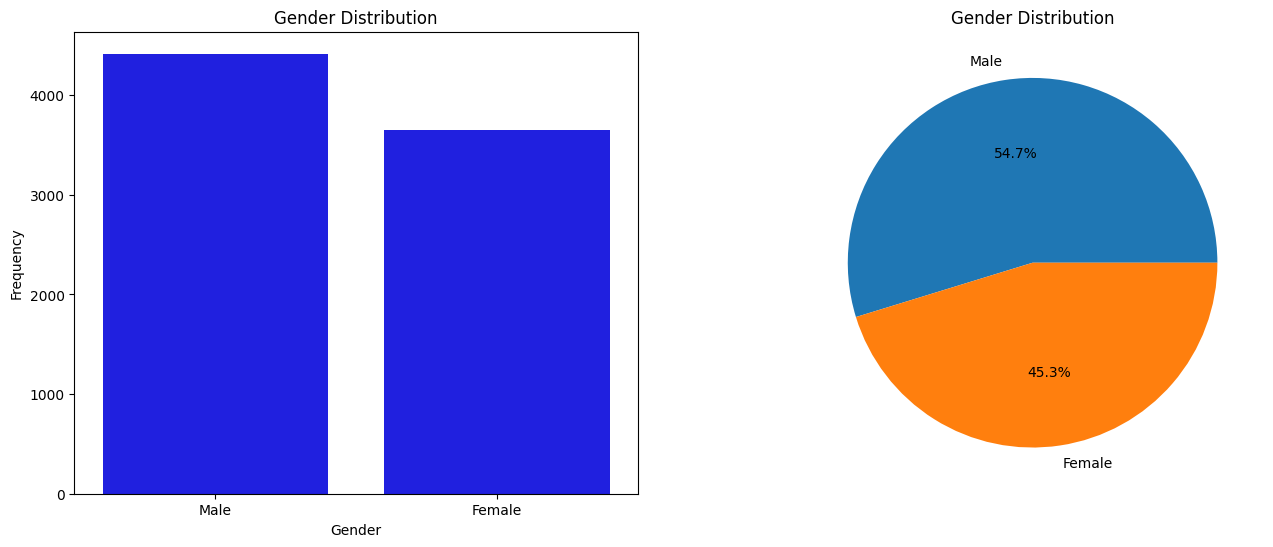

In [21]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x=df['Gender'], color='blue')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.pie(x=df['Gender'].value_counts(), labels=df['Gender'].unique(), autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

Phần lớn khách hàng là nam giới -> Dễ hiểu vì đây là cửa hàng ô tô

### Graduated

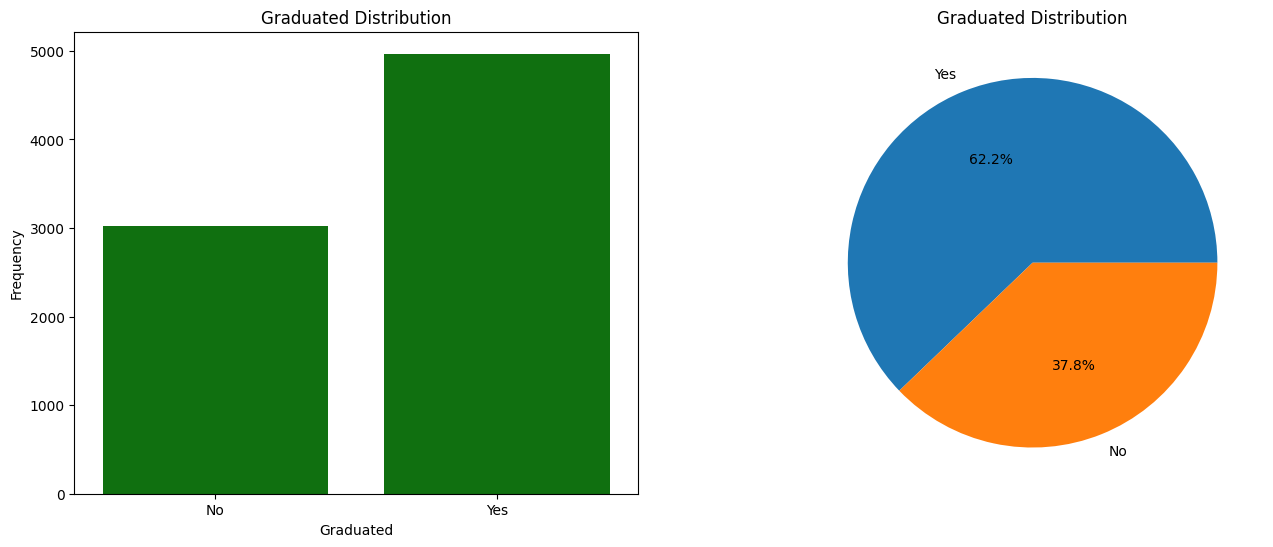

In [22]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x=df['Graduated'], color='Green')
plt.title('Graduated Distribution')
plt.xlabel('Graduated')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
Graduated_count=df['Graduated'].value_counts(dropna=True)
plt.pie(x=Graduated_count, labels=Graduated_count.index, autopct='%1.1f%%')
plt.title('Graduated Distribution')
plt.show()

Số lượng khách hàng đã tốt nghiệp nhiều đáng kế so với khách hàng chưa tốt nghiệp

-> Khách hàng của của hàng chủ yếu là những người có trình độ học vấn cao

### Ever_Married

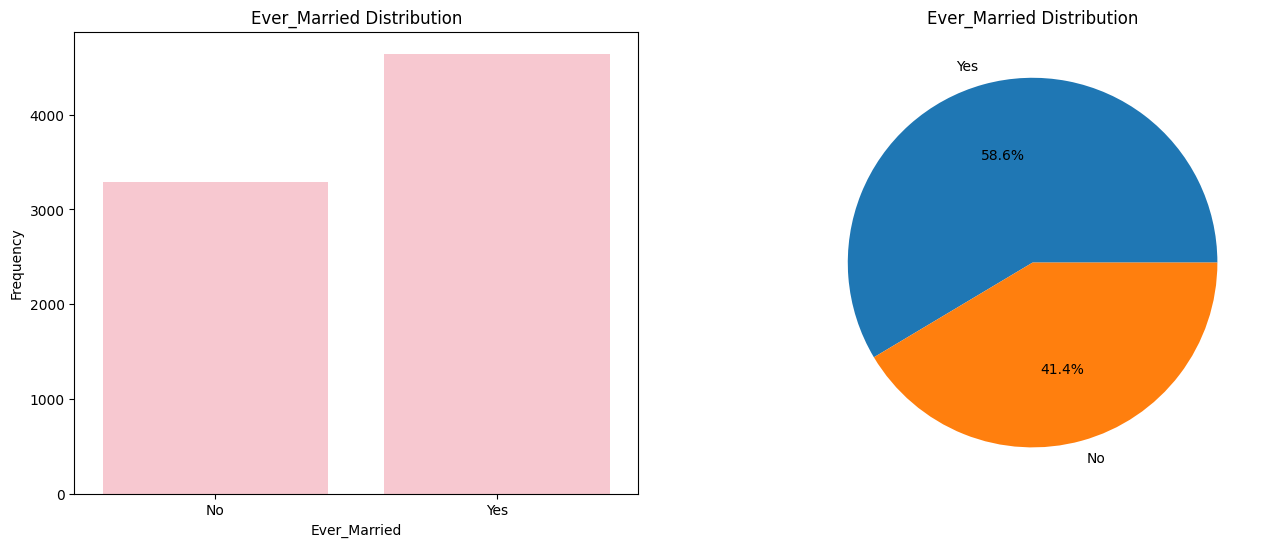

In [23]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x=df['Ever_Married'], color='pink')
plt.title('Ever_Married Distribution')
plt.xlabel('Ever_Married')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
Graduated_count=df['Ever_Married'].value_counts(dropna=True)
plt.pie(x=Graduated_count, labels=Graduated_count.index, autopct='%1.1f%%')
plt.title('Ever_Married Distribution')
plt.show()

Phần lớn khách hàng là những người đã kết hôn

### Profession

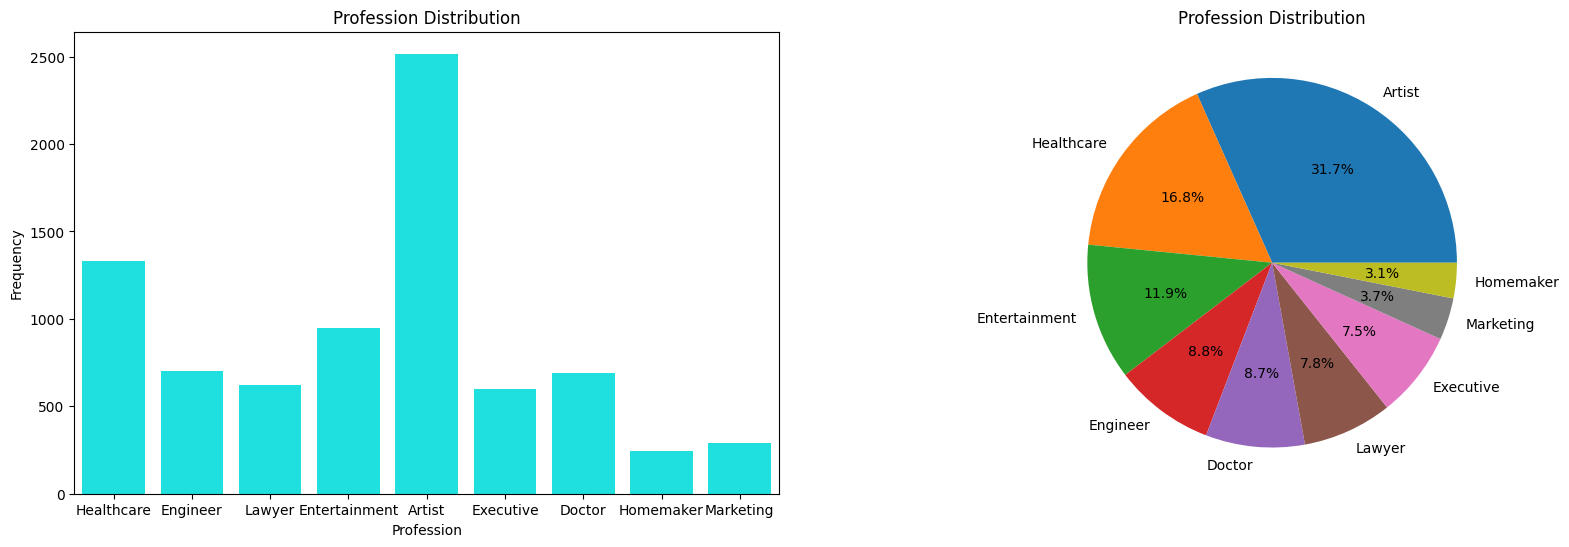

In [24]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x=df['Profession'], color='cyan')
plt.title('Profession Distribution')
plt.xlabel('Profession')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
Graduated_count=df['Profession'].value_counts(dropna=True)
plt.pie(x=Graduated_count, labels=Graduated_count.index, autopct='%1.1f%%')
plt.title('Profession Distribution')
plt.show()

Nghệ sĩ (Artist) chiếm tỷ lệ cao nhất: Chiếm 31.2% tổng số khách hàng

-> Cửa hàng ô tô đang thu hút một lượng lớn khách hàng làm việc trong lĩnh vực nghệ thuật.
Có thể là do nghệ sĩ thường có nhu cầu thể hiện cá tính và phong cách riêng, và ô tô là một phương tiện tốt để họ làm điều đó.

Nhiều khách hàng đến từ các ngành nghề có thu nhập tốt

-> Cửa hàng có thể đang nhắm mục tiêu đến phân khúc khách hàng có thu nhập cao.

### Spending_Score

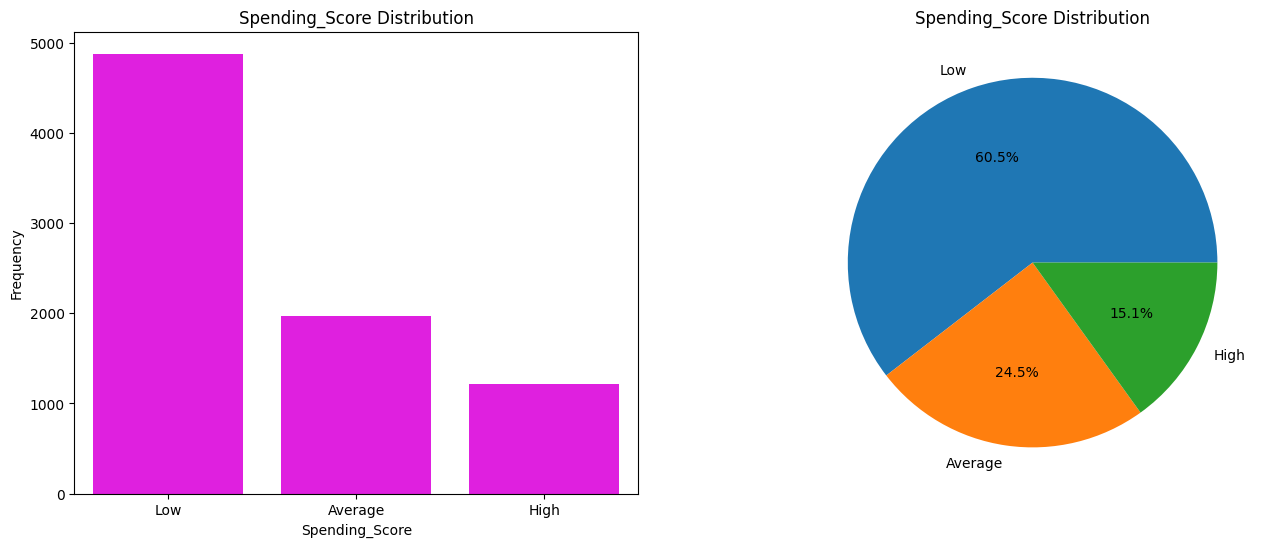

In [25]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x=df['Spending_Score'], color='magenta')
plt.title('Spending_Score Distribution')
plt.xlabel('Spending_Score')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
Graduated_count=df['Spending_Score'].value_counts(dropna=True)
plt.pie(x=Graduated_count, labels=Graduated_count.index, autopct='%1.1f%%')
plt.title('Spending_Score Distribution')
plt.show()

Phần lớn khách hàng của cửa hàng ô tô có điểm chi tiêu thấp. Số lượng khách hàng ở nhóm có điểm chi tiêu trung bình cao hơn nhóm có điểm chi tiêu cao.

-> Khách hàng mua oto có xu hướng chi tiêu tiết kiệm hoặc có ngân sách hạn chế.

### Var_1

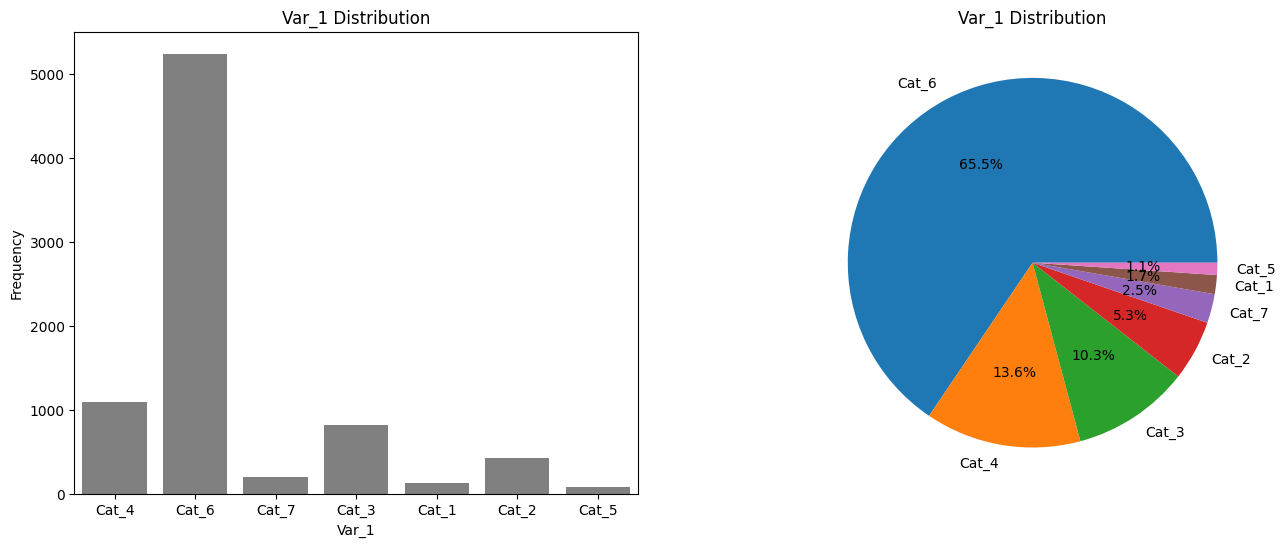

In [26]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x=df['Var_1'], color='grey')
plt.title('Var_1 Distribution')
plt.xlabel('Var_1')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
Graduated_count=df['Var_1'].value_counts(dropna=True)
plt.pie(x=Graduated_count, labels=Graduated_count.index, autopct='%1.1f%%')
plt.title('Var_1 Distribution')
plt.show()

Khách hàng cửa hàng tập trung chủ yếu đến từ nhóm Cat_6 (ẩn danh), đây là nhóm khách hàng mang lại doanh thu cho cửa hàng lớn nhất

### Segmentation

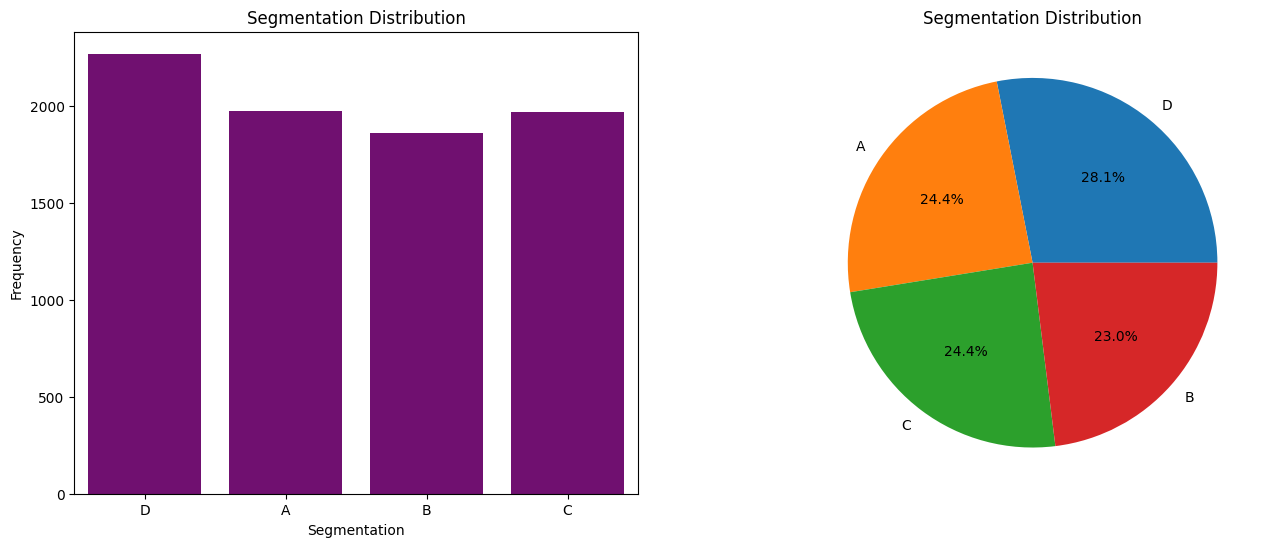

In [27]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x=df['Segmentation'], color='purple')
plt.title('Segmentation Distribution')
plt.xlabel('Segmentation')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
Graduated_count=df['Segmentation'].value_counts(dropna=True)
plt.pie(x=Graduated_count, labels=Graduated_count.index, autopct='%1.1f%%')
plt.title('Segmentation Distribution')
plt.show()

Các phân khúc không chênh lệch quá nhiều, cho thấy sự phân bổ khách hàng khá đồng đều. Tuy nhiên, phân khúc D vẫn chiếm ưu thế.

-> Khách hàng mua oto đồng đều đến từ các phân khúc

## 2.2. Phân tích hai biến

### Định tính - Định lượng

Age

<Axes: xlabel='Age', ylabel='Count'>

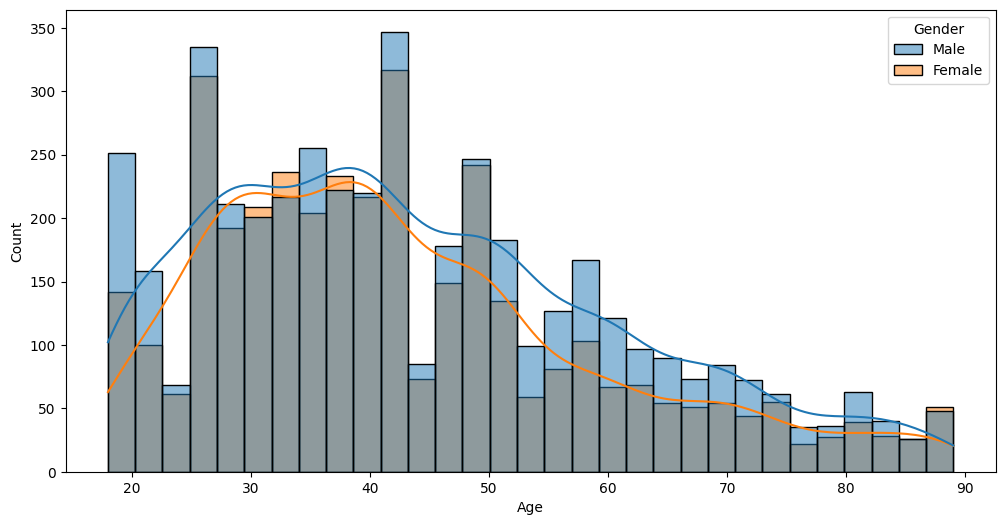

In [28]:
plt.figure(figsize=(12, 6))
sns.histplot(x = df['Age'], hue = df['Gender'], kde=True)

<Axes: xlabel='Age', ylabel='Count'>

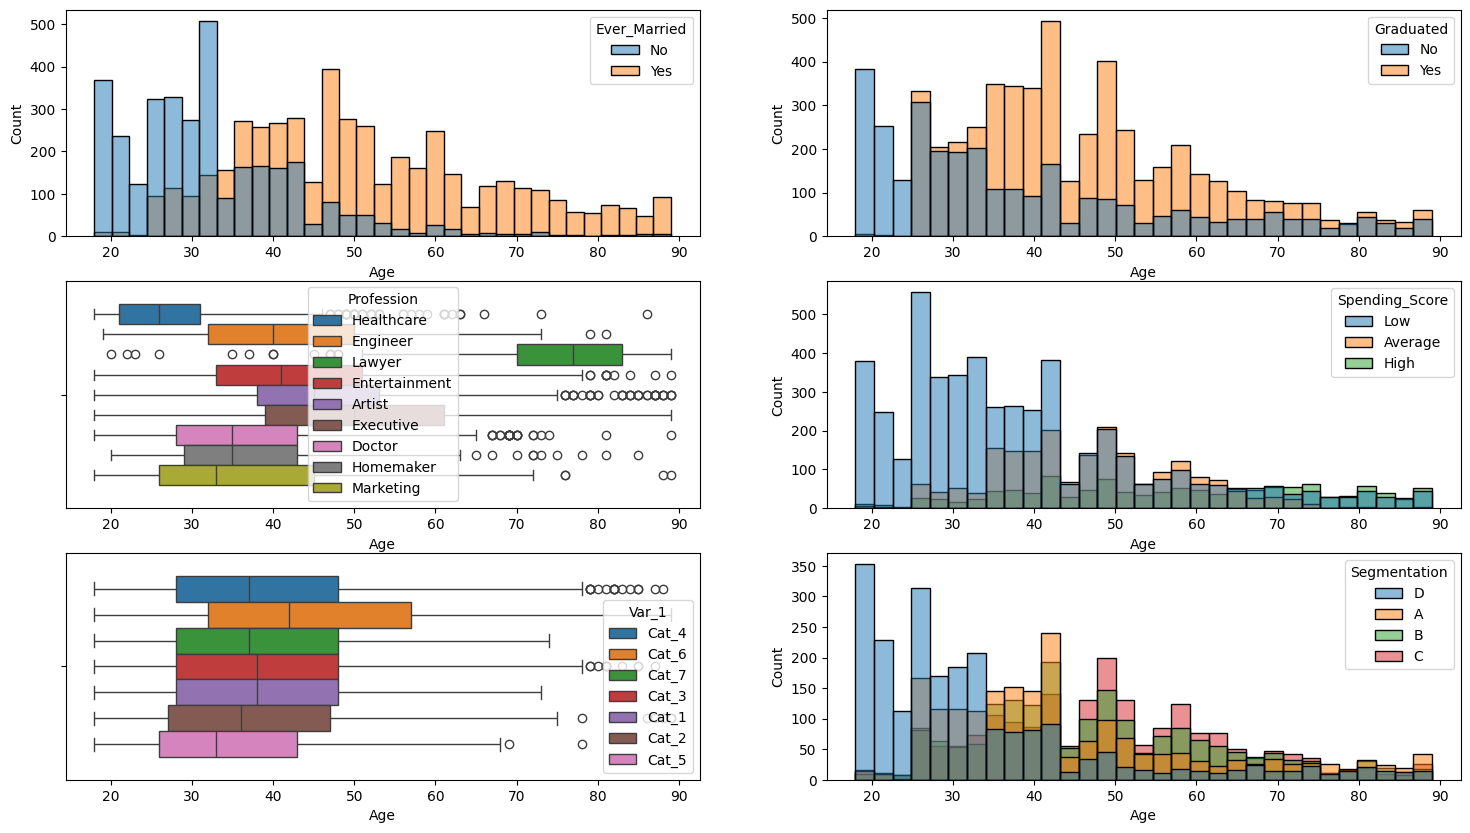

In [29]:
fig, ax = plt.subplots(3, 2, figsize=(18, 10))

sns.histplot(x=df['Age'], hue=df['Ever_Married'], ax=ax[0, 0])
sns.histplot(x=df['Age'], hue=df['Graduated'], ax=ax[0, 1])
sns.boxplot(x=df['Age'], hue=df['Profession'], ax=ax[1, 0])
sns.histplot(x=df['Age'], hue=df['Spending_Score'], ax=ax[1, 1])
sns.boxplot(x=df['Age'], hue=df['Var_1'], ax=ax[2, 0])
sns.histplot(x=df['Age'], hue=df['Segmentation'], ax=ax[2, 1])

Giới tính: Phân bố tương đồng ở nam và nữ, tập trung 20-50 tuổi, cho thấy ít ảnh hưởng lẫn nhau.

Tình trạng hôn nhân:
  - Chưa kết hôn: Lệch phải, tập trung 20-30 tuổi.
  - Đã kết hôn: Lệch trái, trải dài 30-70 tuổi.
  - Mối quan hệ rõ rệt giữa tuổi và tình trạng hôn nhân (trẻ <-> độc thân, trung niên/lớn tuổi <-> có gia đình).

Trình độ học vấn:
  - Chưa tốt nghiệp: Tập trung ở trẻ, giảm dần ở lớn tuổi.
  - Đã tốt nghiệp: Tập trung ở trung niên và lớn tuổi.

Nghề nghiệp:
  - Healthcare: Tập trung tuổi trẻ, kéo dài đến trung niên.
  - Lawyer: Tập trung ở người lớn tuổi.
  - Khác: Phân bố rộng, tập trung trung niên.
  - Có mối quan hệ giữa tuổi và nghề nghiệp.

Mức chi tiêu:
  - Thấp: Tập trung thanh thiếu niên, đặc biệt 20-40 tuổi.
  - Trung bình: Phân bố rộng, tập trung trung niên 35-60 tuổi.
  - Cao: Trải đều các độ tuổi.

Thông tin ẩn: Phân bố khá đều, tập trung 20-40 tuổi, ít ảnh hưởng lẫn nhau.

Phân khúc khách hàng:
  - D: Tập trung giới trẻ 20-35 tuổi.
  - A, C: Phân bố rộng, tập trung trung niên 30-50 tuổi (C còn tập trung 40-60 tuổi).

Work_Experience

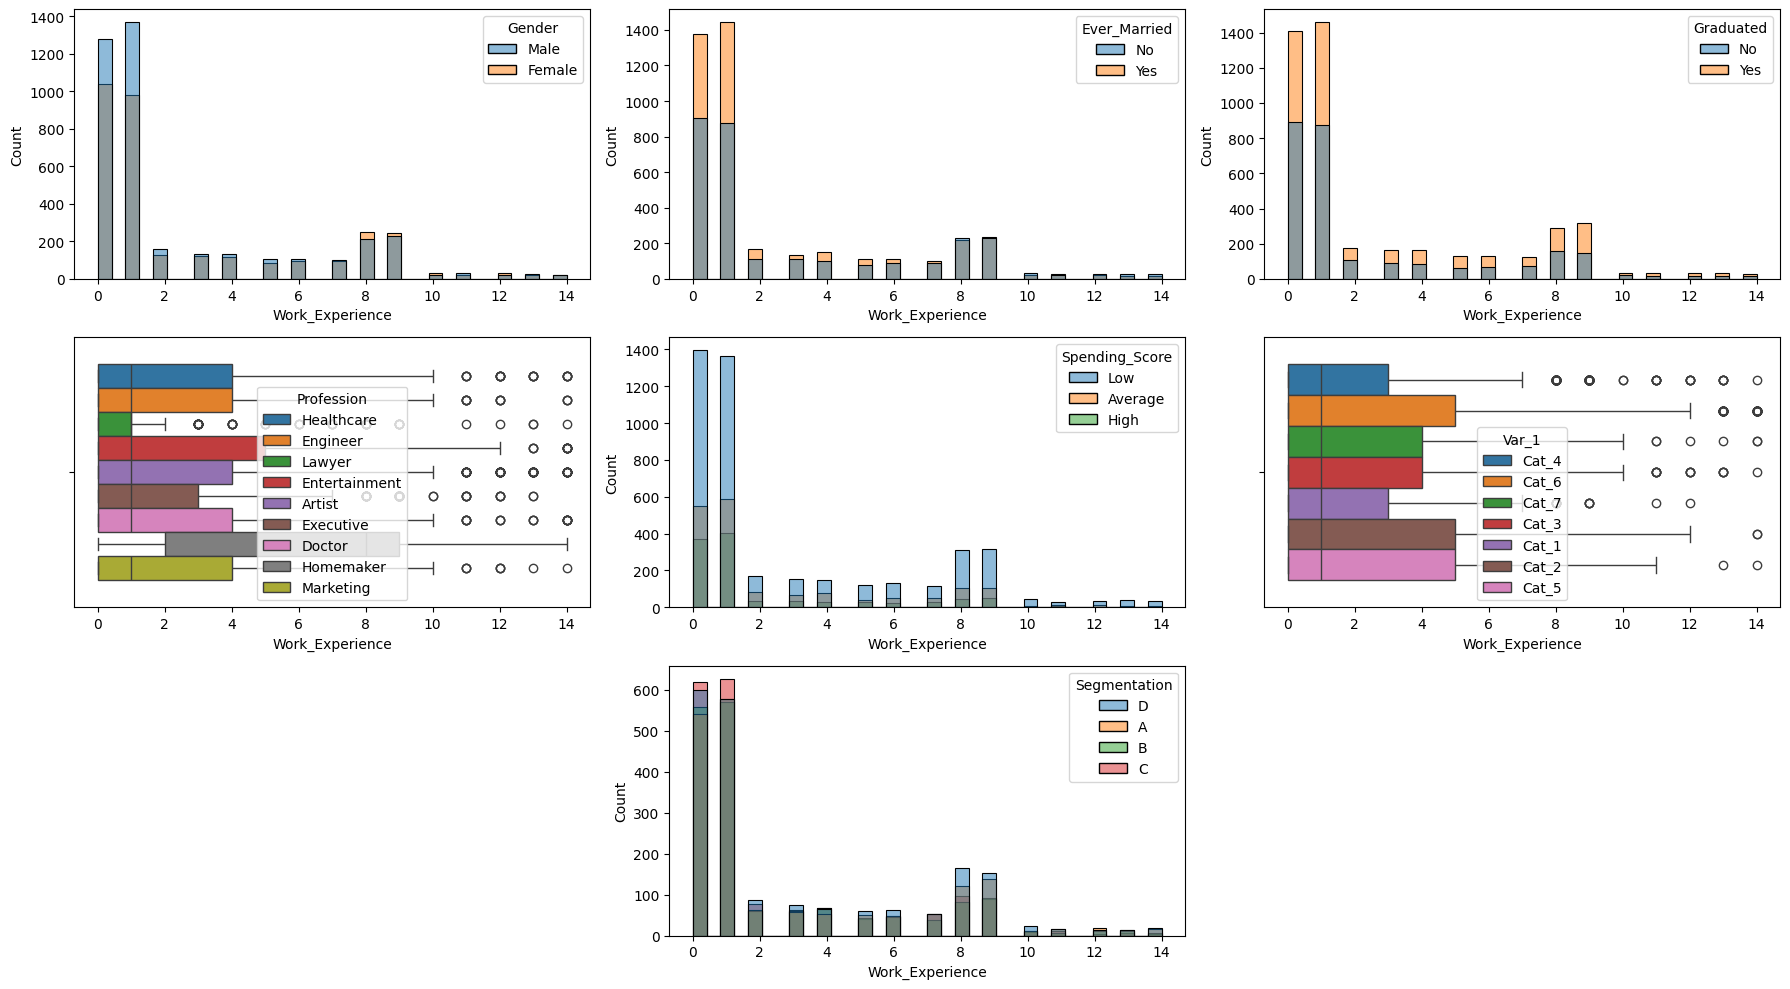

In [30]:
fig, ax = plt.subplots(3, 3, figsize=(18, 10))

sns.histplot(x=df['Work_Experience'], hue=df['Gender'], ax=ax[0, 0])
sns.histplot(x=df['Work_Experience'], hue=df['Ever_Married'], ax=ax[0, 1])
sns.histplot(x=df['Work_Experience'], hue=df['Graduated'], ax=ax[0, 2])
sns.boxplot(x=df['Work_Experience'], hue=df['Profession'], ax=ax[1, 0])
sns.histplot(x=df['Work_Experience'], hue=df['Spending_Score'], ax=ax[1, 1])
sns.boxplot(x=df['Work_Experience'], hue=df['Var_1'], ax=ax[1, 2])
sns.histplot(x=df['Work_Experience'], hue=df['Segmentation'], ax=ax[2, 1])

ax.flat[-1].set_visible(False)
ax.flat[-3].set_visible(False)
plt.tight_layout()

Tổng quan về phân bố kinh nghiệm:

- Nhìn chung, phần lớn đối tượng khảo sát có kinh nghiệm làm việc từ 0-2 năm.
- Xu hướng chung là số lượng người có kinh nghiệm giảm dần khi số năm kinh nghiệm tăng lên (phân bố lệch phải).
- Ảnh hưởng của các thuộc tính cụ thể lên kinh nghiệm

Giới tính: Phân bố kinh nghiệm giữa nam và nữ tương đối giống nhau, cho thấy giới tính ít có mối liên hệ với số năm kinh nghiệm.

Tình trạng hôn nhân: Những người đã kết hôn và chưa kết hôn có xu hướng phân bố kinh nghiệm tương tự, tập trung ở 0-2 năm. Điều này gợi ý tình trạng hôn nhân ít ảnh hưởng đến kinh nghiệm làm việc.

Trình độ học vấn (Graduated): Tương tự như tình trạng hôn nhân, những người đã tốt nghiệp và chưa tốt nghiệp có phân bố kinh nghiệm khá giống nhau, tập trung ở 0-2 năm. Trình độ học vấn có vẻ ít liên quan đến số năm kinh nghiệm.

Nghề nghiệp: Có sự khác biệt rõ rệt trong phân bố kinh nghiệm giữa các ngành nghề:
- HealthCare, Lawyer, Executive, Marketing: Phân bố trải rộng từ 0-6 năm kinh nghiệm, có xu hướng tập trung ở mức kinh nghiệm thấp.
- Homemaker: Tập trung chủ yếu ở mức kinh nghiệm cao (6-8 năm trở lên).
- Các ngành nghề khác: Phân bố kinh nghiệm ở mức trung bình và thấp dần ở các khung kinh nghiệm cao.
Mức chi tiêu (Spending_Score): Các mức chi tiêu khác nhau có xu hướng phân bố kinh nghiệm tương tự, tập trung ở mức thấp. Mức chi tiêu có vẻ ít liên quan đến số năm kinh nghiệm.

Thông tin ản: Phân bố kinh nghiệm khá đồng đều, tập trung ở mức 0-4 năm, có vẻ ít ảnh hưởng đến kinh nghiệm làm việc.

Phân khúc khách hàng (Segmentation): Các nhóm khách hàng khác nhau có phân bố kinh nghiệm khá đồng đều, tập trung ở mức 0-2 năm. Phân khúc khách hàng có vẻ ít liên quan đến số năm kinh nghiệm.

Family_Size

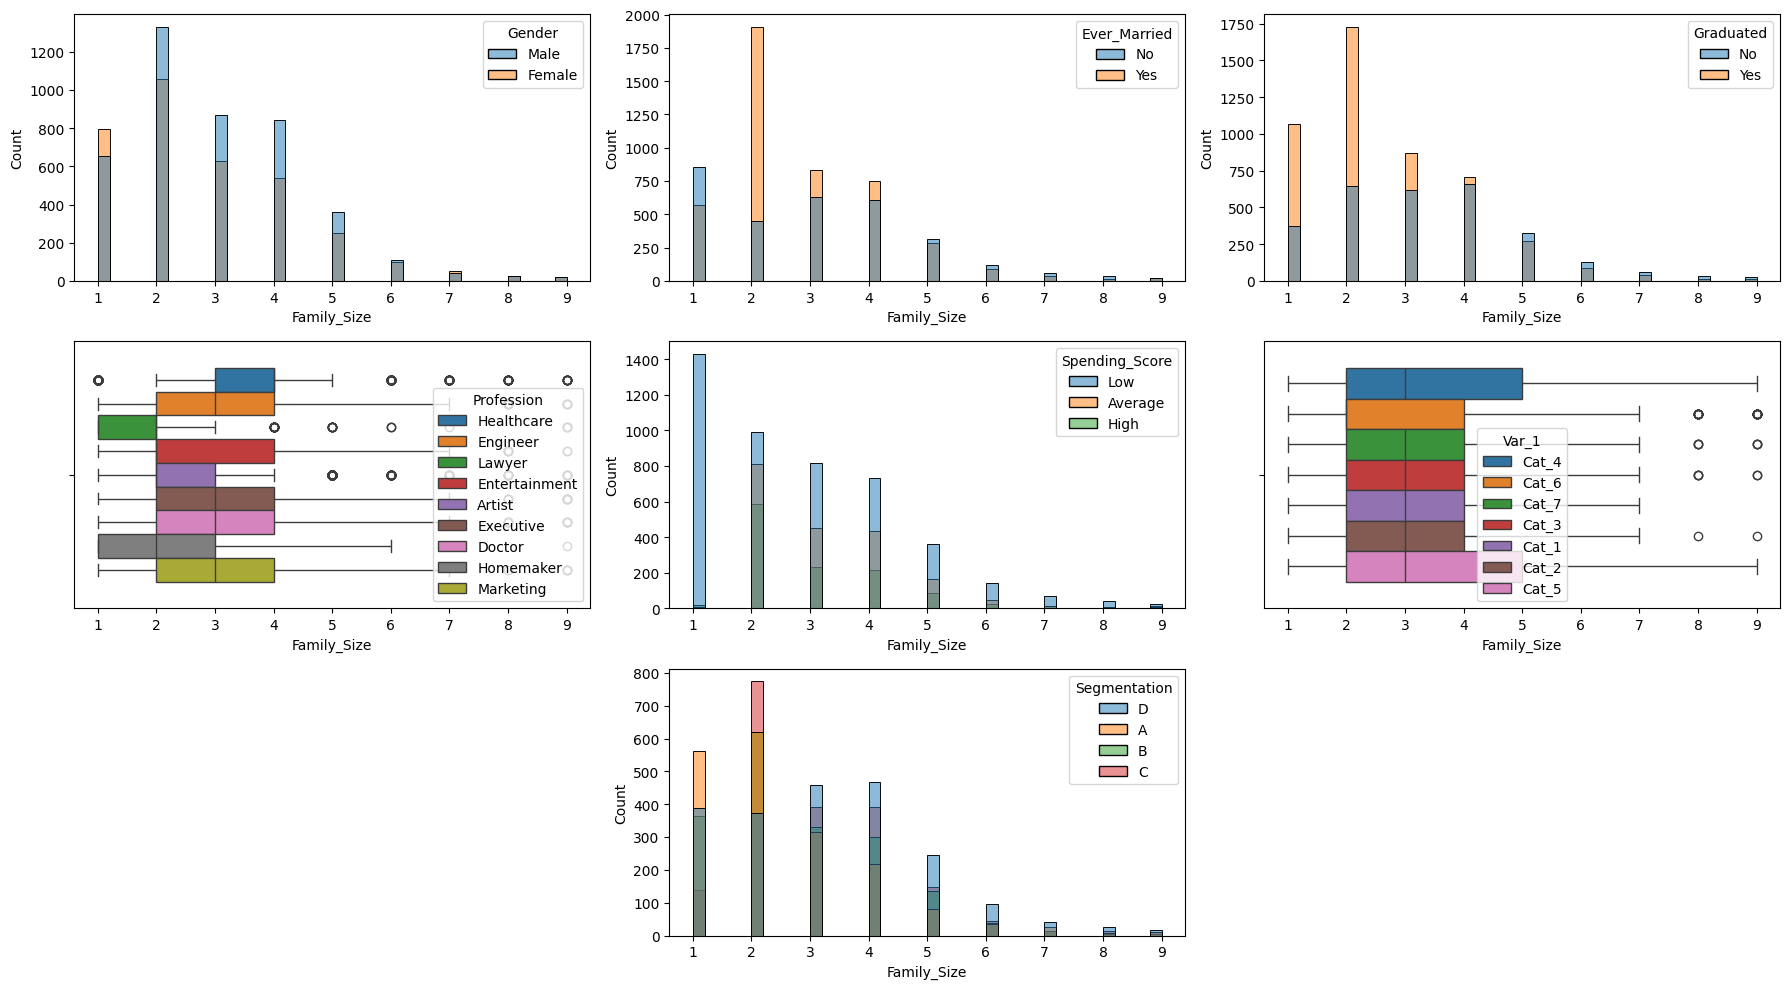

In [31]:
fig, ax = plt.subplots(3, 3, figsize=(18, 10))

sns.histplot(x=df['Family_Size'], hue=df['Gender'], ax=ax[0, 0])
sns.histplot(x=df['Family_Size'], hue=df['Ever_Married'], ax=ax[0, 1])
sns.histplot(x=df['Family_Size'], hue=df['Graduated'], ax=ax[0, 2])
sns.boxplot(x=df['Family_Size'], hue=df['Profession'], ax=ax[1, 0])
sns.histplot(x=df['Family_Size'], hue=df['Spending_Score'], ax=ax[1, 1])
sns.boxplot(x=df['Family_Size'], hue=df['Var_1'], ax=ax[1, 2])
sns.histplot(x=df['Family_Size'], hue=df['Segmentation'], ax=ax[2, 1])

ax.flat[-1].set_visible(False)
ax.flat[-3].set_visible(False)
plt.tight_layout()

Giới tính: Phân bố quy mô gia đình ở cả nam và nữ đều có xu hướng tập trung ở các gia đình nhỏ (1-5 thành viên) và khá tương đồng nhau. Giới tính dường như không có tác động đáng kể đến quy mô gia đình.

Tình trạng hôn nhân: Người chưa kết hôn có xu hướng sống trong các gia đình có quy mô từ nhỏ đến trung bình (1-5 thành viên), trong khi người đã kết hôn tập trung chủ yếu ở quy mô gia đình nhỏ hơn (1-4 thành viên), đặc biệt là 2 người. Tình trạng hôn nhân và quy mô gia đình có mối liên hệ, người đã kết hôn thường có xu hướng sống trong gia đình nhỏ hơn.

Trình độ học vấn: Tương tự như tình trạng hôn nhân, những người đã tốt nghiệp có sự phân bố quy mô gia đình khác biệt so với những người chưa tốt nghiệp.Trình độ học vấn có thể liên quan đến quy mô gia đình.

Nghề nghiệp: Có sự khác biệt rõ rệt về phân bố quy mô gia đình giữa các ngành nghề. Luật sư và người nội trợ thường có quy mô gia đình nhỏ (1-3 thành viên). Nhân viên y tế cũng có xu hướng tương tự. Các ngành nghề còn lại có quy mô gia đình đa dạng hơn, tập trung ở mức 2-4 thành viên. Nghề nghiệp có ảnh hưởng đến quy mô gia đình.

Mức chi tiêu: Người có mức chi tiêu thấp thường sống trong các gia đình nhỏ (1-2 thành viên), trong khi người có mức chi tiêu vừa và cao tập trung ở quy mô gia đình 2-4 thành viên. Mức chi tiêu có thể liên quan đến quy mô gia đình, nhưng không phải là yếu tố quyết định.

Thông tin ẩn: Hầu hết các nhóm thông tin ẩn có sự phân bố quy mô gia đình tương đối giống nhau, trải dài từ nhỏ đến lớn, ngoại trừ nhóm Cat_6 tập trung ở quy mô nhỏ hơn (1-4 thành viên). Nhìn chung, Var_1 ít có mối liên hệ rõ ràng với quy mô gia đình.

Phân khúc khách hàng (Segmentation): Các nhóm khách hàng khác nhau có sự phân bố quy mô gia đình khá đồng đều, tập trung ở các gia đình nhỏ (0-4 thành viên), đặc biệt là 2 người. Phân khúc khách hàng dường như không có tác động lớn đến quy mô gia đình.

### Định lượng + Định lượng

Age - Work_Experience

<Axes: xlabel='Age', ylabel='Work_Experience'>

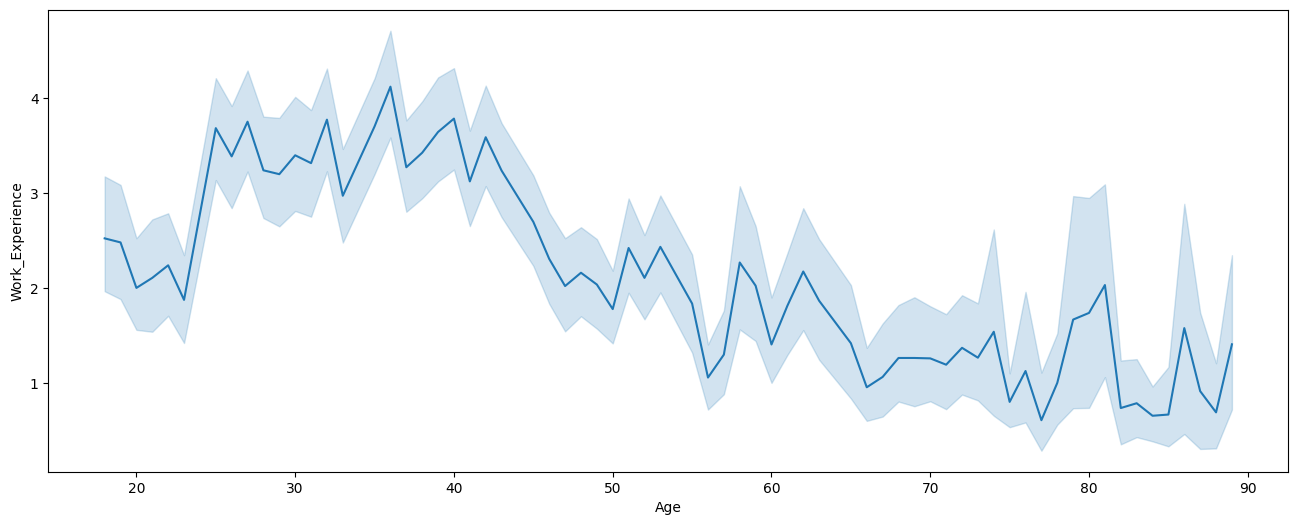

In [32]:
plt.figure(figsize=(16, 6))
sns.lineplot(x=df['Age'], y=df['Work_Experience'])

Kinh nghiệm làm việc có xu hướng tăng lên khi tuổi còn trẻ và trung niên, đạt đỉnh điểm quanh độ tuổi 40, sau đó có dấu hiệu suy giảm dần khi tuổi cao hơn. Sự biến động về kinh nghiệm cũng lớn hơn ở nhóm người lớn tuổi.

Kết luận: Tuổi tác có ảnh hưởng đáng kể đến kinh nghiệm làm việc, với một xu hướng tăng trưởng rồi giảm dần theo độ tuổi.

Age - Family_Size

<Axes: xlabel='Age', ylabel='Work_Experience'>

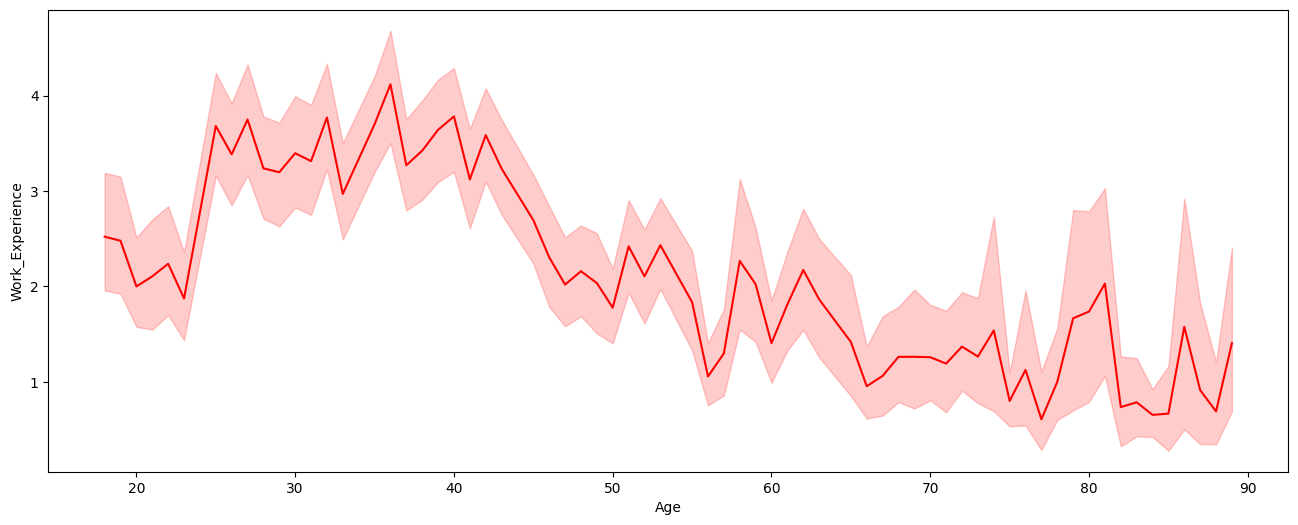

In [33]:
plt.figure(figsize=(16, 6))
sns.lineplot(x=df['Age'], y=df['Work_Experience'], color='red')

Quy mô gia đình thường có xu hướng nhỏ hơn khi tuổi tác tăng lên.

Kết luận: Tuổi tác có mối quan hệ nghịch biến với quy mô gia đình, tuổi càng cao, quy mô gia đình có xu hướng càng nhỏ.

Work_Experience - Family_Size

<Axes: xlabel='Work_Experience', ylabel='Family_Size'>

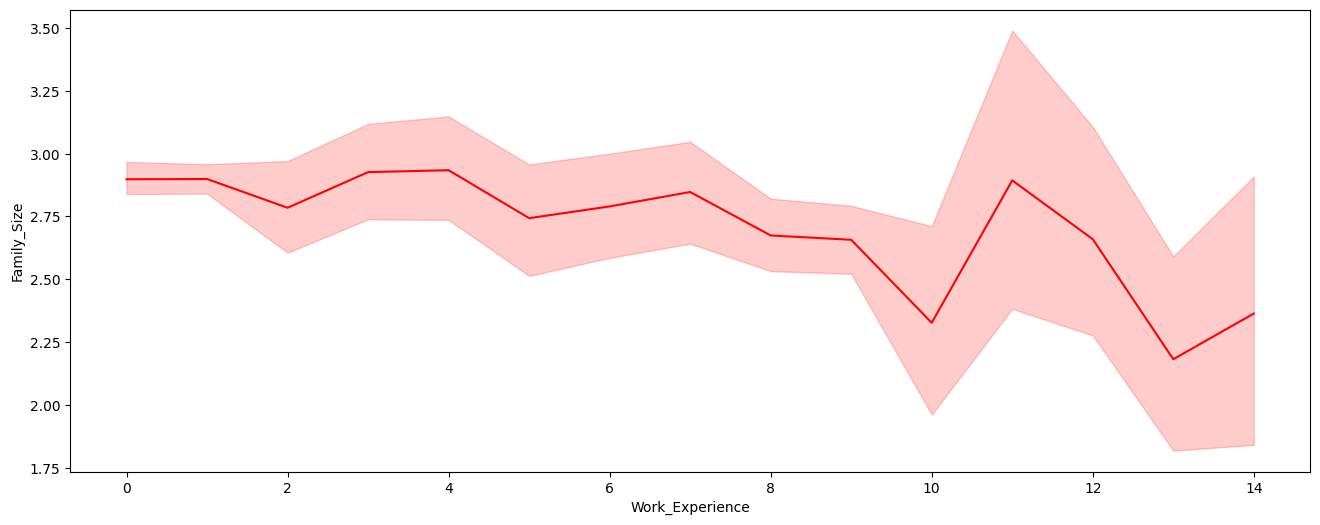

In [34]:
plt.figure(figsize=(16, 6))
sns.lineplot(x=df['Work_Experience'], y=df['Family_Size'], color='red')

Mặc dù quy mô gia đình có xu hướng giảm khi kinh nghiệm làm việc tăng lên, sự thay đổi này không rõ rệt và có nhiều biến động, đặc biệt ở những người có kinh nghiệm làm việc lâu năm.

Kết luận: Mối quan hệ giữa kinh nghiệm làm việc và quy mô gia đình không mạnh mẽ và có thể bị ảnh hưởng bởi nhiều yếu tố khác.

### Định tính - Định tính

Gender

<Axes: xlabel='Gender', ylabel='count'>

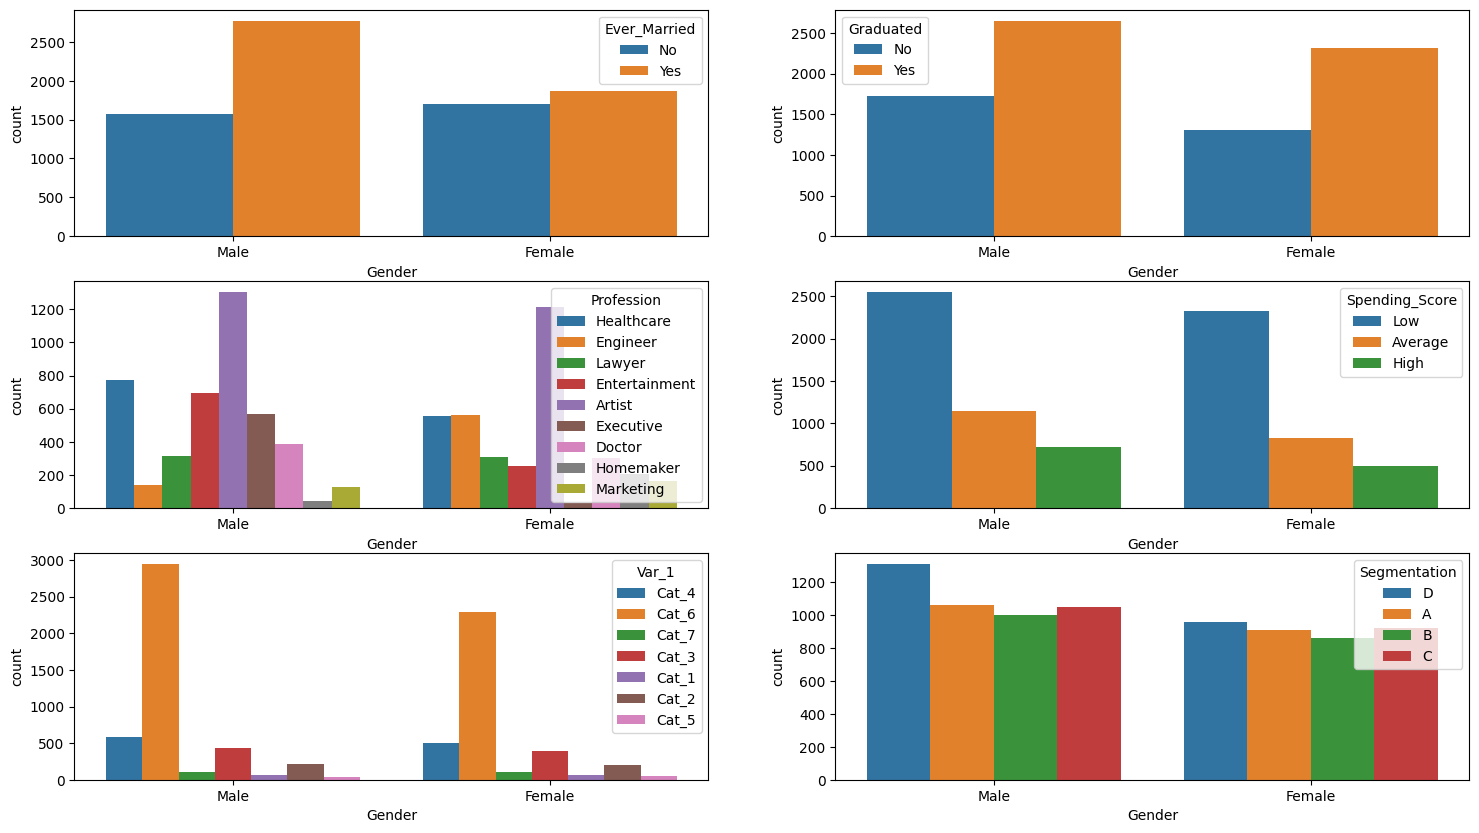

In [35]:
fig, ax = plt.subplots(3, 2, figsize=(18, 10))
index = 0

sns.countplot(x=df['Gender'], hue=df['Ever_Married'], ax=ax[0, 0])
sns.countplot(x=df['Gender'], hue=df['Graduated'], ax=ax[0, 1])
sns.countplot(x=df['Gender'], hue=df['Profession'], ax=ax[1, 0])
sns.countplot(x=df['Gender'], hue=df['Spending_Score'], ax=ax[1, 1])
sns.countplot(x=df['Gender'], hue=df['Var_1'], ax=ax[2, 0])
sns.countplot(x=df['Gender'], hue=df['Segmentation'], ax=ax[2, 1])

Tình trạng hôn nhân: Nhìn chung, tỷ lệ người đã kết hôn cao hơn ở cả nam và nữ. Tuy nhiên, xu hướng này rõ rệt hơn ở nam giới. Điều này cho thấy có một mối quan hệ nhỏ giữa giới tính và tình trạng hôn nhân, với nam giới có xu hướng kết hôn nhiều hơn nữ giới.

Trình độ học vấn (Graduated): Cả nam và nữ đều tập trung chủ yếu ở nhóm đã tốt nghiệp, với sự khác biệt nhỏ về số lượng giữa hai giới. Điều này cho thấy trình độ học vấn và giới tính ít có mối liên hệ với nhau.

Nghề nghiệp: Có sự phân biệt rõ rệt về nghề nghiệp giữa nam và nữ. Các ngành như Y tế, Quản lý cấp cao, Bác sĩ, Nghệ sĩ có số lượng nam giới vượt trội hơn hẳn nữ giới. Ngược lại, các ngành Kỹ sư, Nội trợ và Marketing lại có số lượng nữ giới nhiều hơn nam giới. Các ngành nghề còn lại có sự phân bố tương đối đồng đều giữa hai giới. Điều này cho thấy có mối quan hệ giữa giới tính và loại hình nghề nghiệp.

Điểm chi tiêu (Spending_Score): Sự khác biệt về mức chi tiêu giữa nam và nữ không đáng kể. Điều này cho thấy giới tính ít ảnh hưởng đến mức độ chi tiêu.

Thông tin ẩn: Ngoại trừ hạng mục Cat_6 có sự khác biệt lớn về tỷ lệ giữa nam và nữ, các hạng mục khác của thông tin ẩn có sự phân bố khá tương đồng giữa hai giới. Điều này cho thấy giới tính và thông tin ẩn ít có mối liên hệ đáng kể.

Phân khúc khách hàng (Segmentation): Ngoại trừ nhóm khách hàng D có sự chênh lệch đáng kể về tỷ lệ nam và nữ, các nhóm khách hàng khác có sự phân bố giới tính khá tương đồng. Điều này cho thấy giới tính ít có ảnh hưởng đến việc phân loại khách hàng, ngoại trừ một nhóm cụ thể.

Ever_Married

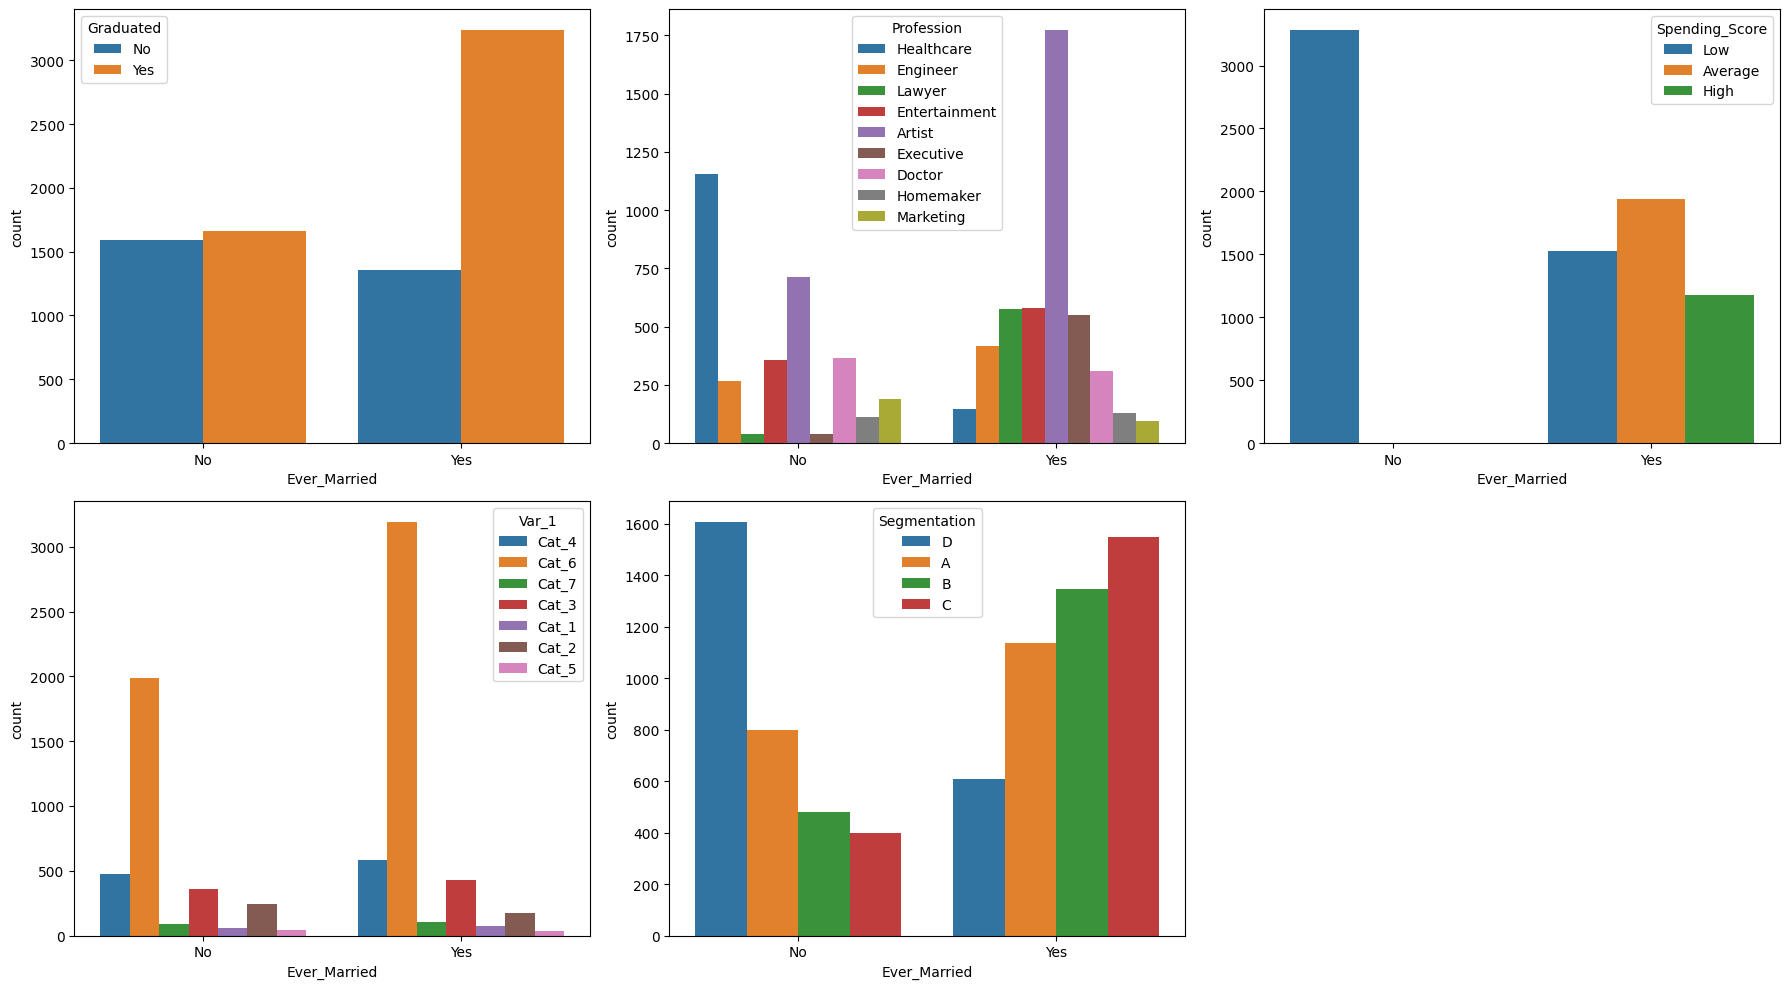

In [36]:
fig, ax = plt.subplots(2, 3, figsize=(18, 10))

sns.countplot(x=df['Ever_Married'], hue=df['Graduated'], ax=ax[0, 0])
sns.countplot(x=df['Ever_Married'], hue=df['Profession'], ax=ax[0, 1])
sns.countplot(x=df['Ever_Married'], hue=df['Spending_Score'], ax=ax[0, 2])
sns.countplot(x=df['Ever_Married'], hue=df['Var_1'], ax=ax[1, 0])
sns.countplot(x=df['Ever_Married'], hue=df['Segmentation'], ax=ax[1, 1])

ax.flat[-1].set_visible(False)
plt.tight_layout()

Trình độ học vấn (Graduated): Số lượng người đã kết hôn ở nhóm chưa tốt nghiệp tương đương với nhóm đã tốt nghiệp. Tuy nhiên, ở nhóm đã tốt nghiệp, số lượng người đã kết hôn cao hơn đáng kể so với nhóm chưa tốt nghiệp. Điều này cho thấy có mối quan hệ giữa tình trạng hôn nhân và trình độ học vấn, với xu hướng người đã tốt nghiệp có tỷ lệ kết hôn cao hơn.

Nghề nghiệp: Các ngành nghề như Y tế, Bác sĩ, Marketing có số lượng người chưa kết hôn nhiều hơn. Ngược lại, các ngành nghề còn lại có sự khác biệt lớn, với số lượng người đã kết hôn chiếm ưu thế. Điều này cho thấy có sự phân bổ khác nhau về tình trạng hôn nhân giữa các ngành nghề, ngụ ý có mối quan hệ giữa nghề nghiệp và tình trạng hôn nhân.

Điểm chi tiêu (Spending_Score): Mức chi tiêu thấp chủ yếu thuộc về những người đã kết hôn. Đáng chú ý là ở mức chi tiêu vừa và cao, chỉ có những người đã kết hôn xuất hiện. Điều này cho thấy có sự khác biệt về mức độ chi tiêu giữa những người đã kết hôn và chưa kết hôn, ngụ ý có mối quan hệ giữa mức chi tiêu và tình trạng hôn nhân.

Thông tin ẩn: Ngoại trừ hạng mục Cat_6 có sự khác biệt lớn về tỷ lệ giữa người đã kết hôn và chưa kết hôn, các hạng mục khác của biến số Var_1 có sự phân bố khá tương đồng giữa hai nhóm tình trạng hôn nhân. Điều này cho thấy tình trạng hôn nhân và thông tin ẩn ít có mối liên hệ đáng kể.

Phân khúc khách hàng (Segmentation): Ngoại trừ nhóm khách hàng D có sự khác biệt lớn, với số lượng người chưa kết hôn chiếm phần lớn, các nhóm khách hàng khác chủ yếu là những người đã kết hôn. Điều này cho thấy có sự khác biệt về tỷ lệ người đã kết hôn giữa các nhóm khách hàng, ngụ ý có mối quan hệ giữa tình trạng hôn nhân và phân khúc khách hàng.

Graduated

<Axes: xlabel='Graduated', ylabel='count'>

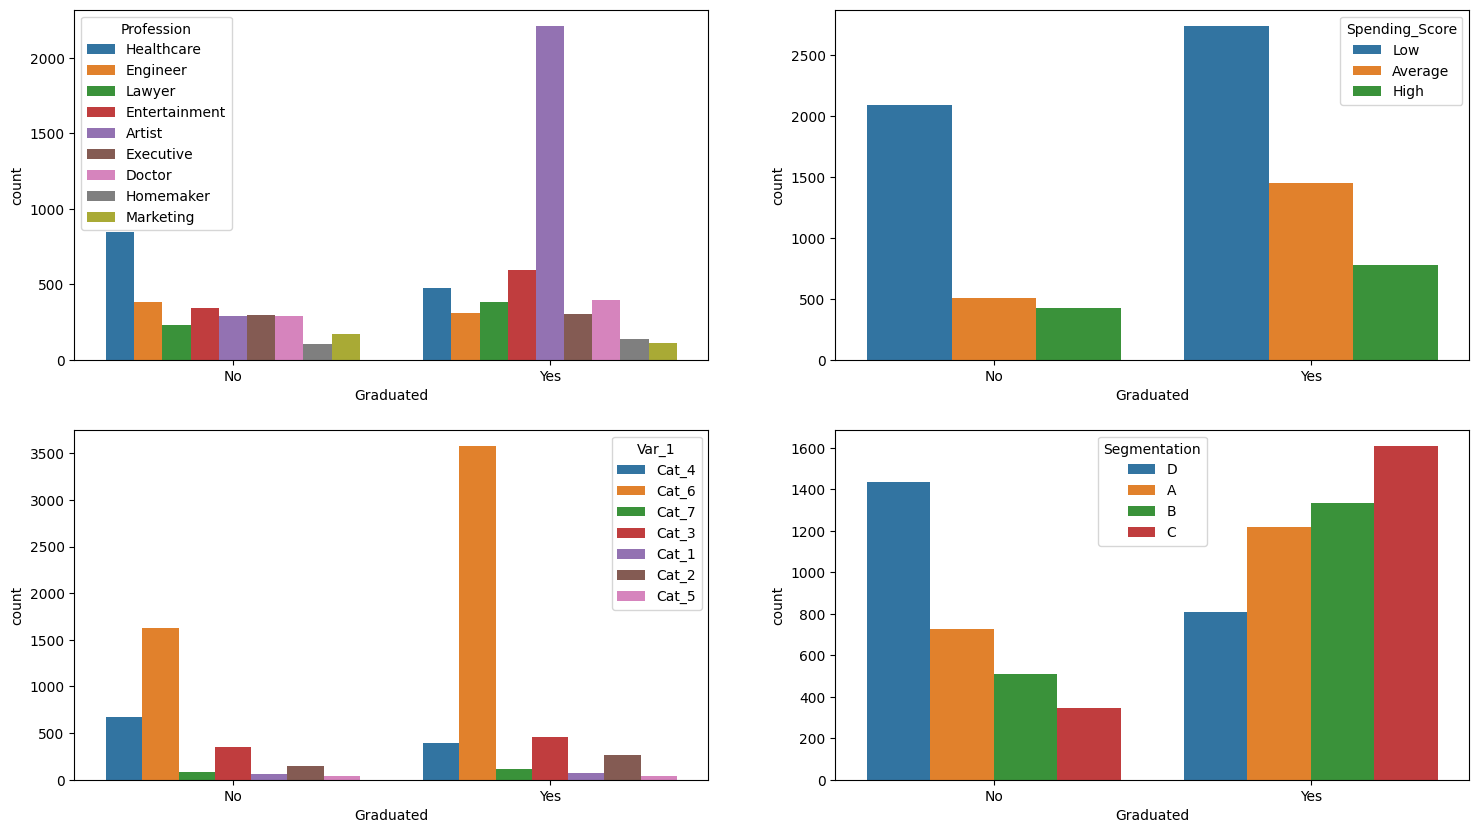

In [37]:
fig, ax = plt.subplots(2, 2, figsize=(18, 10))

sns.countplot(x=df['Graduated'], hue=df['Profession'], ax=ax[0, 0])
sns.countplot(x=df['Graduated'], hue=df['Spending_Score'], ax=ax[0, 1])
sns.countplot(x=df['Graduated'], hue=df['Var_1'], ax=ax[1, 0])
sns.countplot(x=df['Graduated'], hue=df['Segmentation'], ax=ax[1, 1])

Nghề nghiệp: Các ngành nghề như Nghệ sĩ, Giải trí, Bác sĩ, Luật sư có số lượng người đã tốt nghiệp cao hơn đáng kể so với những người chưa tốt nghiệp. Trong khi đó, các ngành nghề còn lại có sự khác biệt không lớn giữa hai nhóm trình độ học vấn. Điều này cho thấy có sự phân bổ khác nhau về trình độ học vấn giữa các ngành nghề, ngụ ý có mối quan hệ giữa nghề nghiệp và trình độ học vấn.

Điểm chi tiêu (Spending_Score): Ở cả ba mức chi tiêu (thấp, vừa, cao), số lượng người đã tốt nghiệp đều vượt trội hơn so với số lượng người chưa tốt nghiệp. Tuy nhiên, sự chênh lệch giữa các mức chi tiêu trong nhóm đã tốt nghiệp và chưa tốt nghiệp không quá lớn. Điều này cho thấy có một mối quan hệ nhỏ giữa mức chi tiêu và trình độ học vấn, với xu hướng người đã tốt nghiệp có xu hướng chi tiêu cao hơn một chút.

Thông tin ẩn: Các hạng mục Cat_6, Cat_3, Cat_2 có tỷ lệ người đã tốt nghiệp cao hơn. Ngược lại, hạng mục Cat_4 lại có tỷ lệ người chưa tốt nghiệp cao hơn. Các hạng mục còn lại của Thông tin ẩn có sự phân bố khá tương đồng giữa hai nhóm trình độ học vấn. Điều này cho thấy có mối quan hệ giữa Thông tin ẩn và trình độ học vấn, đặc biệt ở một số hạng mục cụ thể.

Phân khúc khách hàng (Segmentation): Ngoại trừ nhóm khách hàng D có số lượng người chưa tốt nghiệp nhiều hơn, các nhóm khách hàng khác đều có số lượng người đã tốt nghiệp chiếm ưu thế. Điều này cho thấy có sự khác biệt về trình độ học vấn giữa các nhóm khách hàng, ngụ ý có mối quan hệ giữa trình độ học vấn và phân khúc khách hàng.

Profession

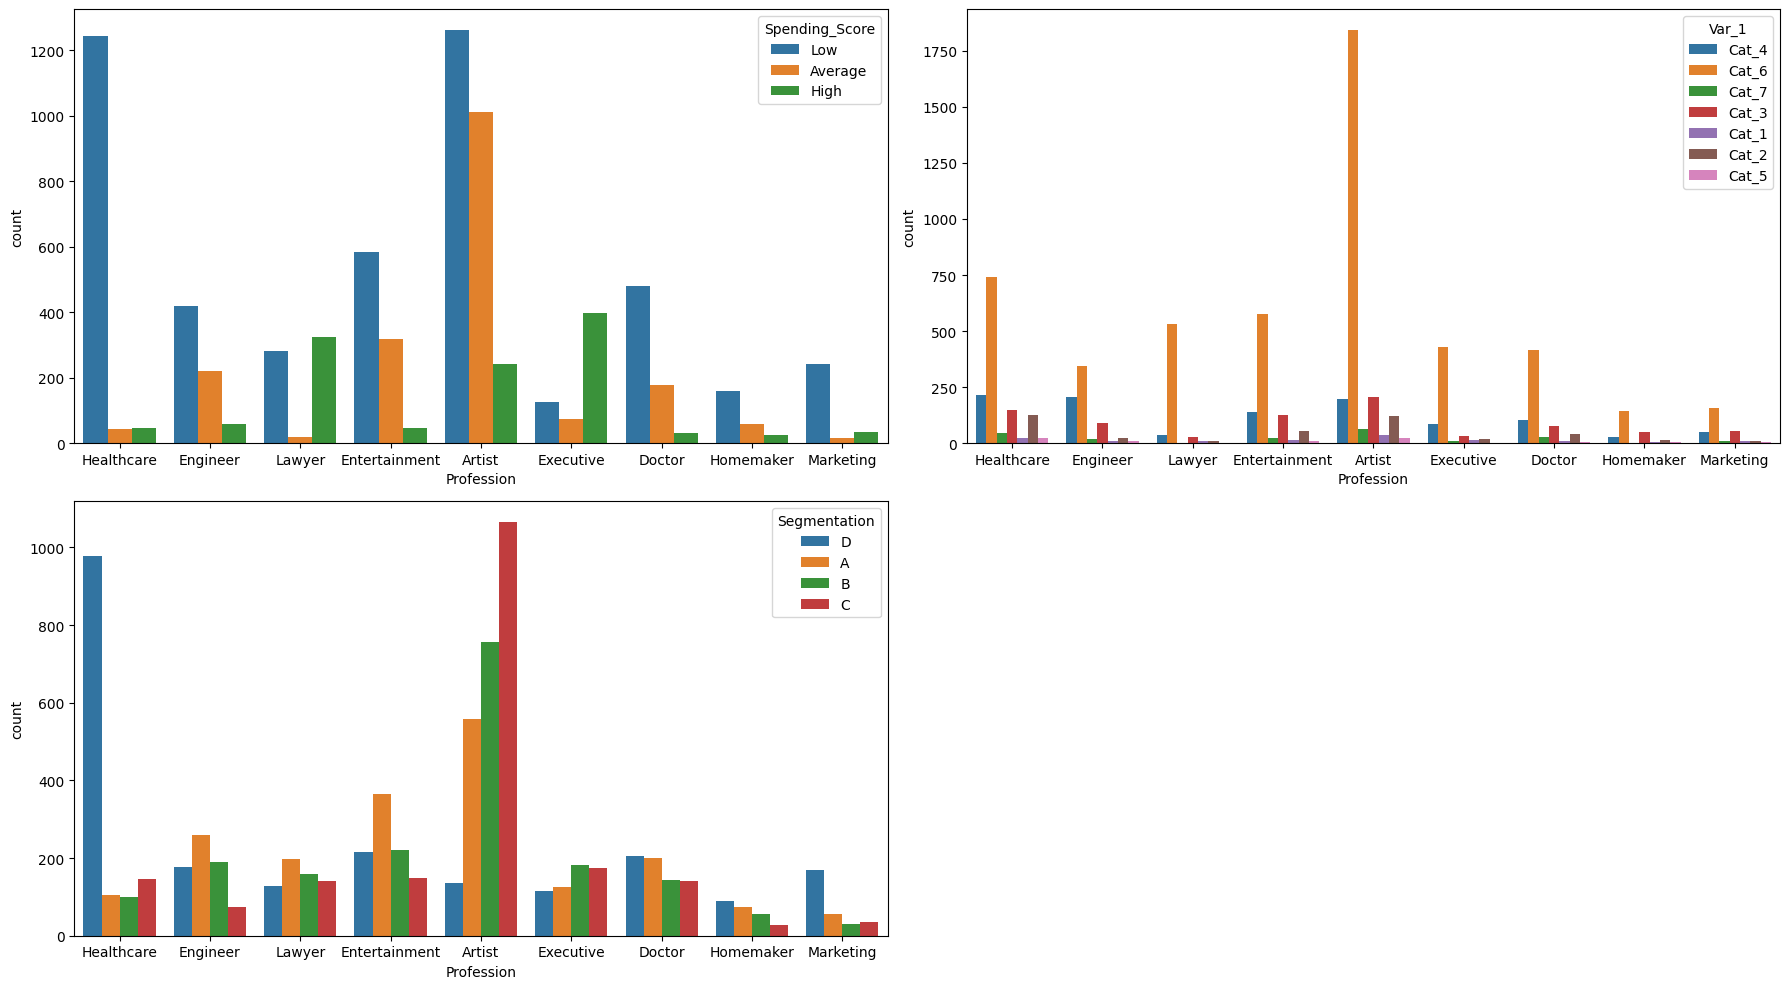

In [38]:
fig, ax = plt.subplots(2, 2, figsize=(18, 10))

sns.countplot(x=df['Profession'], hue=df['Spending_Score'], ax=ax[0, 0])
sns.countplot(x=df['Profession'], hue=df['Var_1'], ax=ax[0, 1])
sns.countplot(x=df['Profession'], hue=df['Segmentation'], ax=ax[1, 0])

ax.flat[-1].set_visible(False)
plt.tight_layout()

Điểm chi tiêu (Spending_Score): Mức chi tiêu thấp chủ yếu thuộc về những người làm trong ngành Nghệ thuật và Y tế. Các nhóm nghề nghiệp khác có mức chi tiêu thấp tương đương nhau. Ở mức chi tiêu vừa, ngành Nghệ thuật chiếm ưu thế, trong khi ngành Luật sư và Marketing có rất ít người thuộc nhóm này. Mức chi tiêu cao có sự tham gia đáng kể của các ngành Nghệ thuật, Luật sư và Quản lý cấp cao, còn các ngành nghề khác có tỷ lệ tương đương nhau. Điều này cho thấy có sự khác biệt về mức chi tiêu giữa các ngành nghề, ngụ ý có mối quan hệ giữa nghề nghiệp và mức chi tiêu.

Thông tin ẩn: Ngoại trừ hạng mục Cat_6 có sự phân bố đa dạng của các nhóm nghề nghiệp, đặc biệt là ngành Họa sĩ chiếm tỷ lệ cao, các hạng mục còn lại của Thông tin ẩn có mức độ phân bố khá tương đồng giữa các ngành nghề. Điều này cho thấy có mối quan hệ nhỏ giữa Thông tin ẩn và nghề nghiệp.

Phân khúc khách hàng (Segmentation): Ngoại trừ nhóm khách hàng D có sự tập trung cao của những người làm trong ngành Y tế, các nhóm khách hàng khác chủ yếu là những người làm trong ngành Nghệ thuật. Điều này cho thấy có sự khác biệt về nghề nghiệp giữa các nhóm khách hàng, ngụ ý có mối quan hệ giữa nghề nghiệp và phân khúc khách hàng.

Spending_Score

<Axes: xlabel='Spending_Score', ylabel='count'>

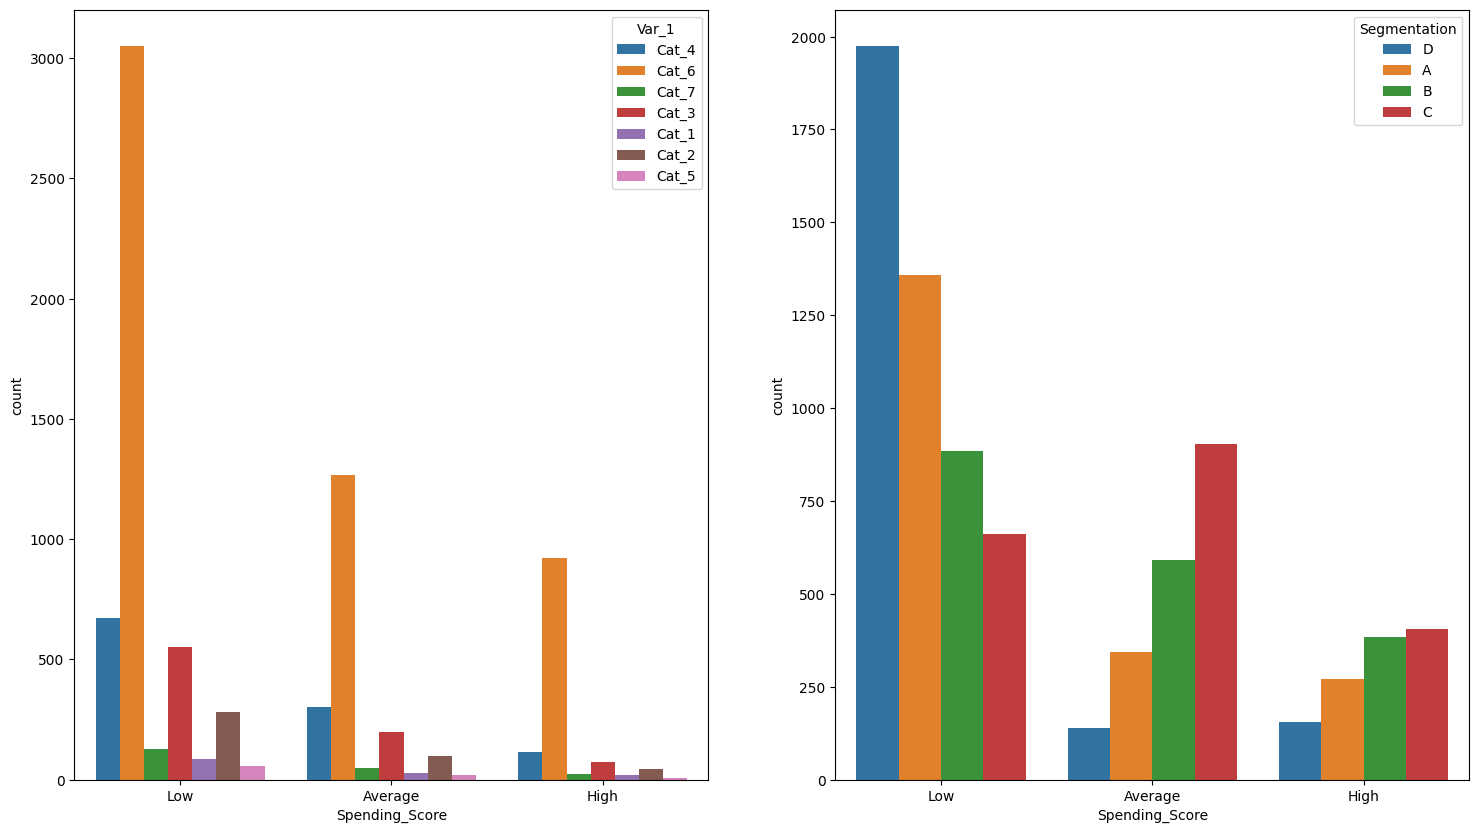

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(18, 10))

sns.countplot(x=df['Spending_Score'], hue=df['Var_1'], ax=ax[0])
sns.countplot(x=df['Spending_Score'], hue=df['Segmentation'], ax=ax[1])

Thông tin ẩn: Nhìn chung, các hạng mục của Thông tin ẩn có sự phân bố tương đối đồng đều về mức độ chi tiêu, với nhóm có mức chi tiêu thấp thường chiếm số lượng lớn nhất. Điều này cho thấy có một mối quan hệ không đáng kể giữa Thông tin ẩn và mức độ chi tiêu.

Phân khúc khách hàng (Segmentation): Ngoại trừ nhóm khách hàng CC có xu hướng tập trung vào mức độ chi tiêu vừa, các nhóm khách hàng khác lại có số lượng người thuộc mức độ chi tiêu cao chiếm ưu thế. Điều này cho thấy có sự khác biệt về mức độ chi tiêu giữa các nhóm khách hàng, ngụ ý có mối quan hệ giữa mức độ chi tiêu và phân khúc khách hàng.

Var_1

Text(0, 0.5, 'count')

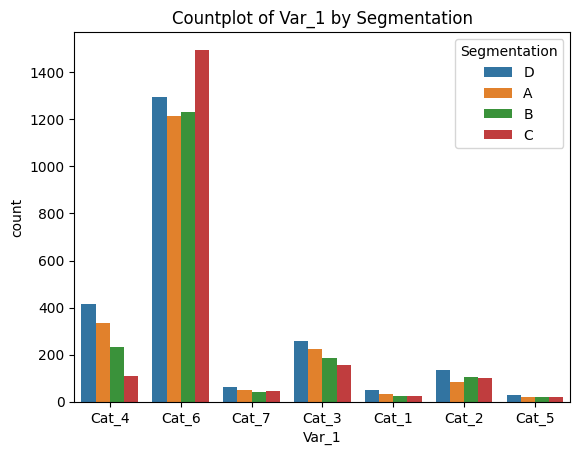

In [40]:
plt.figsize=(18, 10)
sns.countplot(x=df['Var_1'],hue=df['Segmentation'])
plt.title("Countplot of Var_1 by Segmentation")
plt.xlabel("Var_1")
plt.ylabel("count")

Phân khúc khách hàng (Segmentation): Nhìn chung, sự phân bố của từng nhóm khách hàng trong các hạng mục của Thông tin ẩn khá tương đồng nhau, với phần lớn đều tập trung ở hạng mục Cat_6. Điều này cho thấy có một mối quan hệ không đáng kể giữa Thông tin ẩn và phân khúc khách hàng, vì hầu hết các nhóm khách hàng đều có xu hướng tương tự đối với biến số này.

## 2.3. Phân tích đa biến

Ever_Married - Profession - Segmentation

<Axes: xlabel='Ever_Married,Profession'>

<Figure size 1600x1000 with 0 Axes>

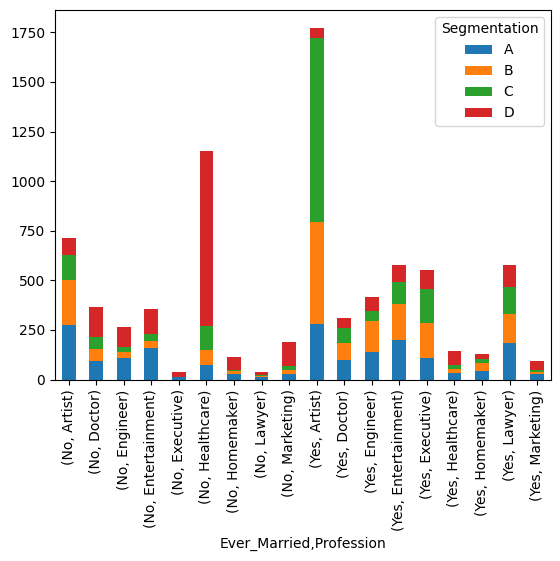

In [55]:
plt.figure(figsize=(16, 10))

crosstab = pd.crosstab([df['Ever_Married'], df['Profession']], df['Segmentation'])

crosstab.plot(kind='bar', stacked=True)

<Axes: xlabel='Profession', ylabel='Age'>

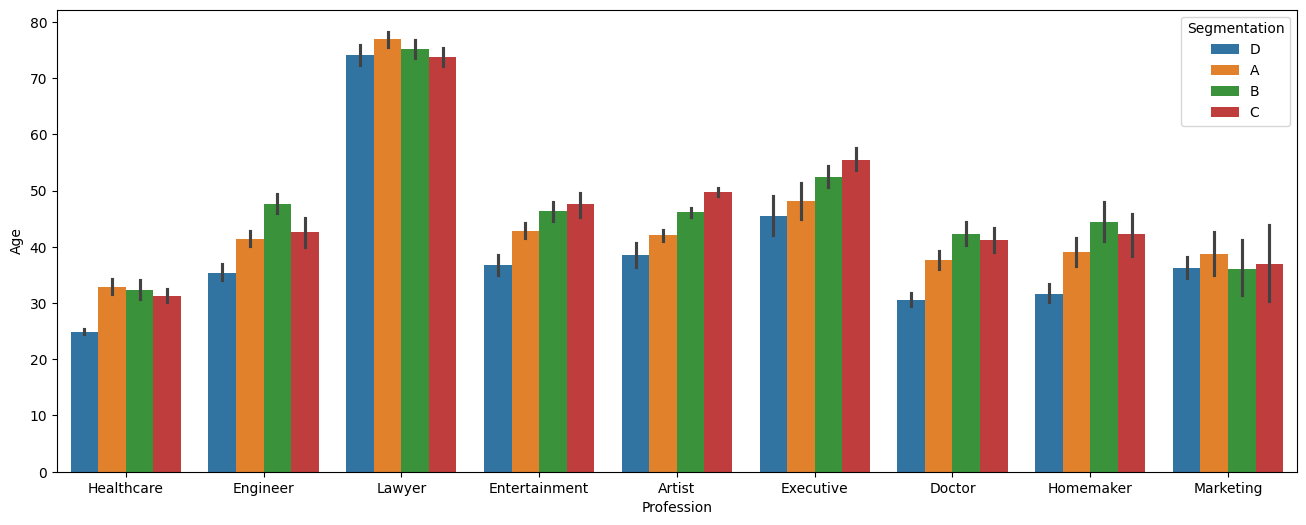

In [52]:
plt.figure(figsize=(16, 6))
sns.barplot(x='Profession', y='Age', hue='Segmentation', data=df, estimator='mean')

In [41]:
!pip install category_encoders
from IPython.display import display
from sklearn.preprocessing import OrdinalEncoder
import category_encoders as ce

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.0 MB/s eta 0:00:00


### Missing Data

In [42]:
df.isnull().sum()

,0
ID,0
Gender,0
Ever_Married,140
Age,0
Graduated,78
Profession,124
Work_Experience,829
Spending_Score,0
Family_Size,335
Var_1,76


In [43]:
df_copy = df.copy()
attribute = ['Ever_Married', 'Graduated', 'Profession', 'Work_Experience', 'Family_Size','Var_1']
for att in attribute:
    df_copy[att] = df_copy[att].fillna(df_copy[att].mode()[0])
    print(df_copy[att].mode()[0])
display(df_copy)

Yes
Yes
Artist
1.0
2.0
Cat_6


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,Artist,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [44]:
df_copy.isnull().sum()

,0
ID,0
Gender,0
Ever_Married,0
Age,0
Graduated,0
Profession,0
Work_Experience,0
Spending_Score,0
Family_Size,0
Var_1,0


### Encoding

In [45]:
Ord = OrdinalEncoder(categories=[['D','C','B','A'],['Male', 'Female'],['No','Yes'], ['No', 'Yes'], ['Cat_1','Cat_2','Cat_3','Cat_4','Cat_5','Cat_6','Cat_7'],['Low', 'Average', 'High']])
df_ord = df_copy.copy()
df_ord[['Segmentation','Gender', 'Ever_Married', 'Graduated', 'Var_1', 'Spending_Score']] = Ord.fit_transform(
    df_copy[['Segmentation','Gender', 'Ever_Married', 'Graduated', 'Var_1', 'Spending_Score']] )

Gen = ce.TargetEncoder()
df_last = df_ord.copy()
df_last[['Profession']] = Gen.fit_transform(df[['Profession']], df[['Segmentation']])
display(df_last)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,0.0,0.0,22,0.0,2.500000,1.0,0.0,4.0,3.0,0.0
1,462643,1.0,1.0,38,1.0,1.240343,1.0,1.0,3.0,3.0,3.0
2,466315,1.0,1.0,67,1.0,1.240343,1.0,0.0,1.0,5.0,2.0
3,461735,0.0,1.0,67,1.0,1.319422,0.0,2.0,2.0,5.0,2.0
4,462669,1.0,1.0,40,1.0,1.224447,1.0,2.0,6.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,0.0,0.0,22,0.0,1.701609,0.0,0.0,7.0,0.0,0.0
8064,464685,0.0,0.0,35,0.0,1.470785,3.0,0.0,4.0,3.0,0.0
8065,465406,1.0,0.0,33,1.0,2.500000,1.0,0.0,1.0,5.0,0.0
8066,467299,1.0,0.0,27,1.0,2.500000,1.0,0.0,4.0,5.0,2.0


### Corrlation Matrix

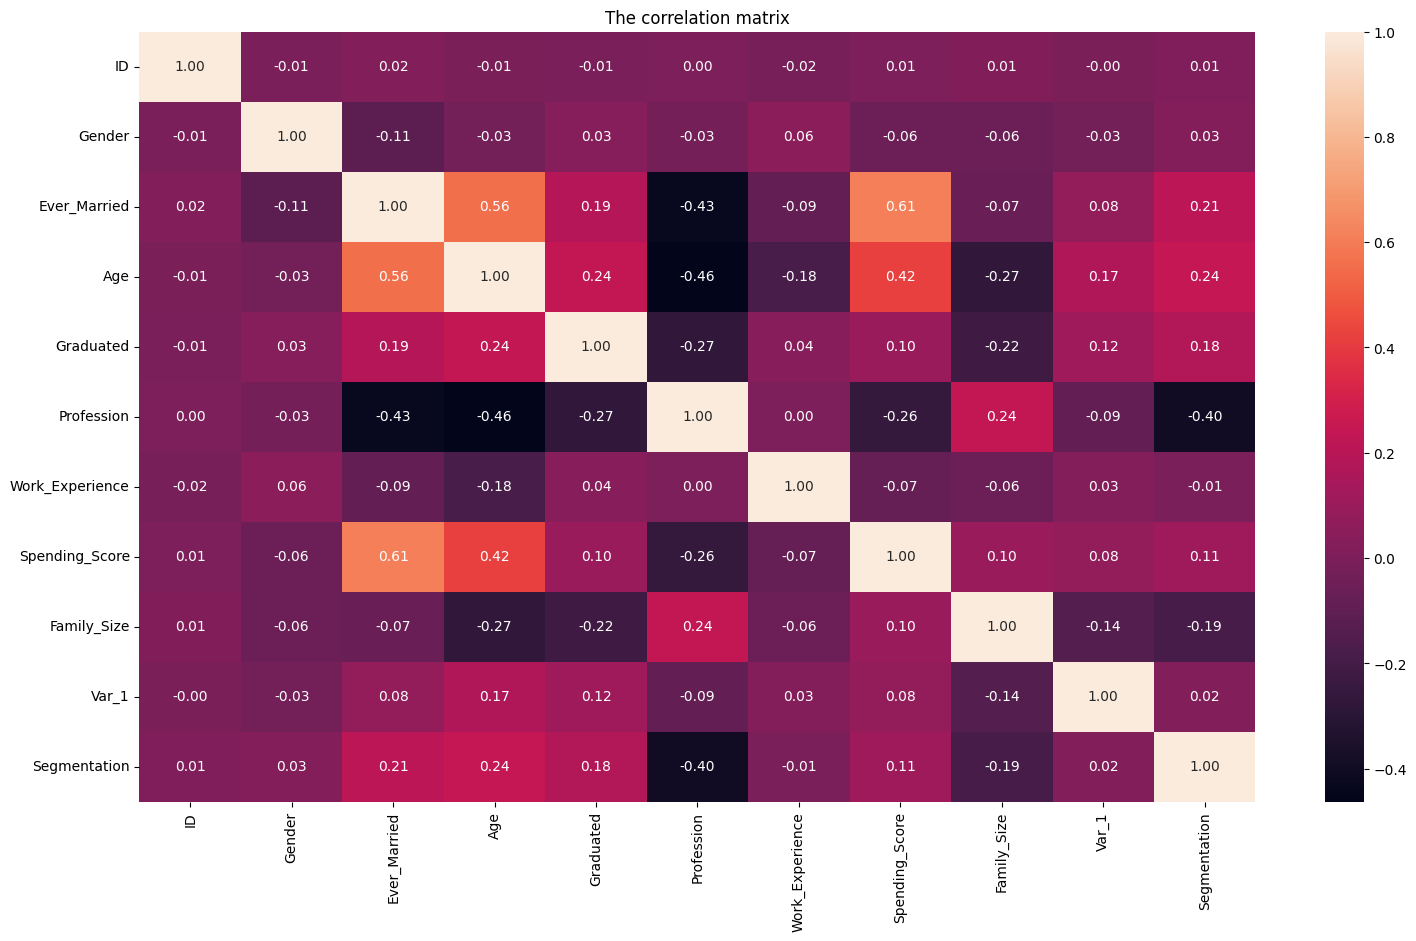

In [46]:
import seaborn as sns
cor = df_last.corr()

plt.figure(figsize = (18, 10))
sns.heatmap(cor, annot = True, fmt='.2f')
plt.title('The correlation matrix')
plt.show()

| **Thuộc tính** | Đặc điểm (Ngoại trừ thuộc tính) | Mức độ |
|-----------|----------|-------|
| **ID** |  TẤT CẢ | Không / Rất yếu  |
| **Gender** | - TẤT CẢ  | Rất yếu |
| **Ever_Married** |  - Spending_Score, Profession, Age | Trung bình |
|   |-  Segment | Yếu |
|  | - ID, Gender, Var_1, Graduated, Family_Size | Rất yếu |
| **Age** | - Ever_Married, Profession, Spending_Score | Trung bình |
|   | - Graduated, Family_Size, Segmentation | Yếu |
| | - ID, Gender, Work_Experience, Var_1 | Rất yếu |
| **Graduated** | - Age, Profession, Family_Size | Yếu |
|  | - Các thuộc tính khác | Rất yếu |
| **Profession** | - Ever_Married, Age, Graduated, Spending_Score, Family_Size, Segmentation | Trung bình |
| | - ID, Gender, Work_Experience, Var_1 | Không / Rất yếu |
| **Work_Experience** | TẤT CẢ | Không / Rất yếu |
| **Spending_Score** | - Even_Married, Age | Trung bình |
|  | - Profession | Yếu |
|  | - Các thuộc tính khác | Rất yếu |
| **Family_Size** | - Age, Graduated, Profession | Yếu |
|  | - Các thuộc tính khác | Rất yếu |
| **Var_1** | TẤT CẢ | Rất yếu |
| **Segmentation** | - Profession | Trung bình |
| | - Ever_Married, Age | Yếu |
| | - Các thuộc tính khác | Rất yếu |


Lưu ý
- |giá trị| = 1 : Tương quan tuyệt đối
- 0.7 <= |giá trị| < 1: Tương quan mạnh
- 0.4 <= |giá trị| < 0.7: Tương quan trung bình
- 0.2 <= |giá trị| < 0.4: Tương quan yếu
- 0 <= |giá trị| < 0.2: Tương quan không có / Rất yếu

## 5. Nhận xét chung

Bối cảnh dữ liệu:

- Bộ dữ liệu chứa thông tin về 8068 khách hàng, bao gồm 11 biến đại diện cho các đặc điểm như giới tính, tình trạng hôn nhân, tuổi, trình độ học vấn, nghề nghiệp, kinh nghiệm làm việc, mức chi tiêu, quy mô gia đình, loại thông tin ẩn danh, và phân khúc khách hàng.

- Dữ liệu được sử dụng để dự đoán nhóm phân khúc khách hàng trong bài toán phân loại đa lớp.

Đặc điểm dữ liệu:

- Dữ liệu thiếu: Một số cột như Ever_Married, Graduated, Profession, Work_Experience, và Family_Size có chứa giá trị thiếu, đặc biệt là Work_Experience. Việc xử lý dữ liệu thiếu là cần thiết.

- Tuổi (Age): Phân bố tập trung ở nhóm tuổi từ 30–50, chủ yếu là người trẻ và trung niên.

- Kinh nghiệm làm việc (Work_Experience): Đa phần khách hàng có ít hoặc không có kinh nghiệm làm việc.

- Quy mô gia đình (Family_Size): Gia đình có 2–3 thành viên chiếm phần lớn; có một số giá trị ngoại lai với quy mô gia đình lớn hơn.

- Mức chi tiêu (Spending_Score): Phần lớn khách hàng có mức chi tiêu thấp, chỉ một số ít ở mức chi tiêu cao.

Mối quan hệ giữa các biến:

- Tuổi và kinh nghiệm làm việc: Kinh nghiệm làm việc tăng theo tuổi đến khoảng 40 tuổi, sau đó giảm dần.

- Tuổi và quy mô gia đình: Quy mô gia đình giảm khi tuổi tăng, người lớn tuổi có xu hướng sống trong gia đình nhỏ.

- Nghề nghiệp và phân khúc khách hàng: Nghệ sĩ (Artist) là nhóm nghề nghiệp chiếm ưu thế trong phân khúc khách hàng.

Thông tin từ dữ liệu:

- Khách hàng chủ yếu thuộc nhóm thông tin ẩn danh Cat_6, đóng góp doanh thu lớn nhất cho cửa hàng.

- Phân khúc khách hàng tương đối đồng đều, nhưng phân khúc D chiếm ưu thế nhẹ.